<a href="https://colab.research.google.com/github/connor-verheyen/COVID19_IndoorRH/blob/main/supplementary_analysis/Supplementary_Section_12_Analyzing_Effects_of_Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries 
import pandas as pd
import numpy as np
import scipy as sp 
import math
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
import matplotlib.dates as md
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
# Set seaborn plotting defaults
sns.set(context='talk', font_scale=0.9, style='whitegrid', palette='Blues_d')

In [ ]:
# For a specific version of seaborn package 
!pip install seaborn==0.10.1

In [ ]:
# Set seaborn plotting style 
sns.set(context='talk', font_scale=0.9, style='ticks', palette='Blues_d')

In [ ]:
# Import Files 
filename='https://raw.githubusercontent.com/connor-verheyen/COVID19_IndoorRH/main/data/supplementary/3DaySmooth_ALLVars_Dataset_2020_08_10_GE50_Deaths.csv'

df7all = pd.read_csv(filename) 

# Drop unnecessary index columns 
df7all.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [ ]:
# Tropic of Cancer is located at 23.5 degrees north of the equator and runs through Mexico, the Bahamas, Egypt, Saudi Arabia, India, and southern China
# The Tropic of Capricorn lies at 23.5 degrees south of the equator and runs through Australia, Chile, southern Brazil, and northern South Africa
upper_lat_bound = 23.5; lower_lat_bound = -23.5 
n_hem = df7all[df7all['Lat']>upper_lat_bound]; s_hem = df7all[df7all['Lat']<lower_lat_bound]; trop  = df7all[(df7all['Lat']<upper_lat_bound) & (df7all['Lat']>lower_lat_bound)]

print('Total Country Count:',df7all['Country'].unique().shape[0])
print('Northern Hemisphere Country Count:',n_hem['Country'].unique().shape[0])
print('Southern Hemisphere Country Count:',s_hem['Country'].unique().shape[0])
print('Tropics Country Count:',trop['Country'].unique().shape[0])

Total Country Count: 125
Northern Hemisphere Country Count: 69
Southern Hemisphere Country Count: 5
Tropics Country Count: 51


In [ ]:
# Assign the region name to each country in the dataset 
df7all.loc[:,'Region'] = ['n_hem' if country_name in n_hem['Country'].unique() else 's_hem' if country_name in s_hem['Country'].unique() else 'trop' for country_name in df7all.loc[:,'Country']]

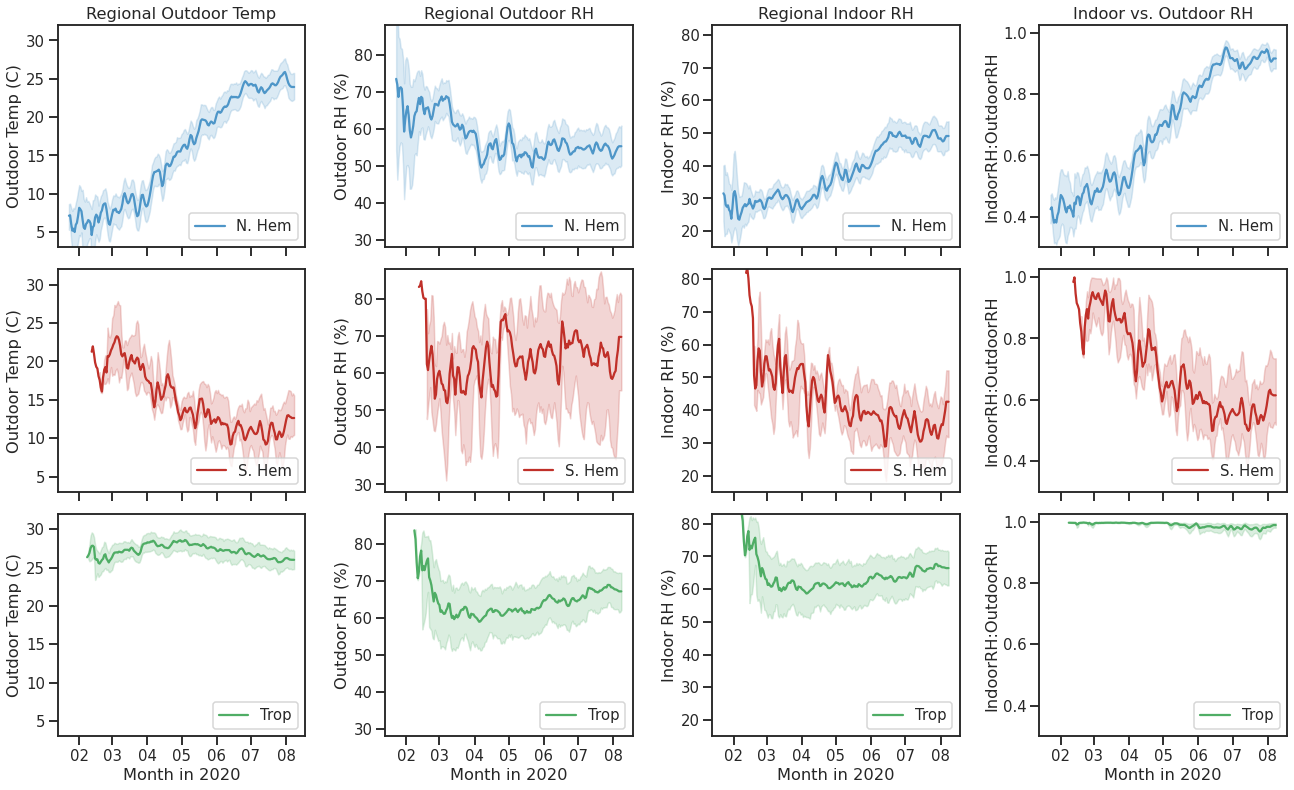

In [ ]:
# Timeseries of outdoor and indoor weather data 

fig,ax = plt.subplots(3,4,sharex='col',sharey='col',figsize=(18,11))

sns.lineplot(x=pd.to_datetime(n_hem['Date'],yearfirst=True,dayfirst=False),y='DailyTemp_C',data=n_hem,ax=ax[0,0],legend=False,color=sns.color_palette(palette='Blues_d',n_colors=4)[1],label='N. Hem'); #sns.despine()
sns.lineplot(x=pd.to_datetime(n_hem['Date'],yearfirst=True,dayfirst=False),y='DailyRH_pct',data=n_hem,ax=ax[0,1],legend=False,color=sns.color_palette(palette='Blues_d',n_colors=4)[1],label='N. Hem'); #sns.despine()
sns.lineplot(x=pd.to_datetime(n_hem['Date'],yearfirst=True,dayfirst=False),y='IndoorRH_pct',data=n_hem,ax=ax[0,2],legend=False,color=sns.color_palette(palette='Blues_d',n_colors=4)[1],label='N. Hem'); #sns.despine()
sns.lineplot(x=pd.to_datetime(n_hem['Date'],yearfirst=True,dayfirst=False),y=n_hem['IndoorRH_pct']/n_hem['DailyRH_pct'],ax=ax[0,3],color=sns.color_palette(palette='Blues_d',n_colors=4)[1],label='N. Hem'); #sns.despine()

sns.lineplot(x=pd.to_datetime(s_hem['Date'],yearfirst=True,dayfirst=False),y='DailyTemp_C',data=s_hem,ax=ax[1,0],legend=False,color=sns.color_palette(palette='Reds_d',n_colors=4)[2],label='S. Hem'); #sns.despine()
sns.lineplot(x=pd.to_datetime(s_hem['Date'],yearfirst=True,dayfirst=False),y='DailyRH_pct',data=s_hem,ax=ax[1,1],legend=False,color=sns.color_palette(palette='Reds_d',n_colors=4)[2],label='S. Hem'); #sns.despine()
sns.lineplot(x=pd.to_datetime(s_hem['Date'],yearfirst=True,dayfirst=False),y='IndoorRH_pct',data=s_hem,ax=ax[1,2],legend=False,color=sns.color_palette(palette='Reds_d',n_colors=4)[2],label='S. Hem'); #sns.despine()
sns.lineplot(x=pd.to_datetime(s_hem['Date'],yearfirst=True,dayfirst=False),y=s_hem['IndoorRH_pct']/s_hem['DailyRH_pct'],ax=ax[1,3],color=sns.color_palette(palette='Reds_d',n_colors=4)[2],label='S. Hem'); #sns.despine()

sns.lineplot(x=pd.to_datetime(trop['Date'],yearfirst=True,dayfirst=False),y='DailyTemp_C',data=trop,ax=ax[2,0],legend=False,color=sns.color_palette(palette='Greens_d',n_colors=4)[1],label='Trop'); #sns.despine()
sns.lineplot(x=pd.to_datetime(trop['Date'],yearfirst=True,dayfirst=False),y='DailyRH_pct',data=trop,ax=ax[2,1],legend=False,color=sns.color_palette(palette='Greens_d',n_colors=4)[1],label='Trop'); #sns.despine()
sns.lineplot(x=pd.to_datetime(trop['Date'],yearfirst=True,dayfirst=False),y='IndoorRH_pct',data=trop,ax=ax[2,2],legend=False,color=sns.color_palette(palette='Greens_d',n_colors=4)[1],label='Trop'); #sns.despine()
sns.lineplot(x=pd.to_datetime(trop['Date'],yearfirst=True,dayfirst=False),y=trop['IndoorRH_pct']/trop['DailyRH_pct'],ax=ax[2,3],color=sns.color_palette(palette='Greens_d',n_colors=4)[1],label='Trop'); #sns.despine()

# Place legends 
[ax[0,c].legend(loc='lower right') for c in np.arange(0,4)]
[ax[1,c].legend(loc='lower right') for c in np.arange(0,4)]
[ax[2,c].legend(loc='lower right') for c in np.arange(0,4)]

# Define Y axis limits 
[ax[r,0].set_ylim(3,32) for r in np.arange(0,3)]; [ax[r,1].set_ylim(28,88) for r in np.arange(0,3)]; [ax[r,2].set_ylim(15,83) for r in np.arange(0,3)]; [ax[r,3].set_ylim(0.3,1.025) for r in np.arange(0,3)]

#ax[0,1].set_ylim(28,88); ax[0,2].set_ylim(15,83); ax[0,3].set_ylim(0.3,1.05)

# Define Y axis labels 
[ax[r,0].set_ylabel('Outdoor Temp (C)') for r in np.arange(0,3)]; 
[ax[r,1].set_ylabel('Outdoor RH (%)') for r in np.arange(0,3)]; 
[ax[r,2].set_ylabel('Indoor RH (%)') for r in np.arange(0,3)]; 
[ax[r,3].set_ylabel('IndoorRH:OutdoorRH') for r in np.arange(0,3)]; 

# Define X axis labels 
ax[2,0].set_xlabel('Month in 2020'); ax[2,1].set_xlabel('Month in 2020'); ax[2,2].set_xlabel('Month in 2020'); ax[2,3].set_xlabel('Month in 2020')

ax[0,0].set_title('Regional Outdoor Temp')
ax[0,1].set_title('Regional Outdoor RH')
ax[0,2].set_title('Regional Indoor RH')
ax[0,3].set_title('Indoor vs. Outdoor RH')

[ax.xaxis.set_major_formatter(md.DateFormatter('%m')) for ax in plt.gcf().axes]
#[ax.tick_params(axis='x',labelrotation=20) for ax in plt.gcf().axes]
#fig.tight_layout()
fig.tight_layout(pad=0.5, w_pad=1.5, h_pad=0.8)

# from google.colab import files
# filename = ('Figure_Outdoor_Indoor_Climate_Timeseries.png')
# fig.savefig(filename, dpi=500)
# files.download(filename)

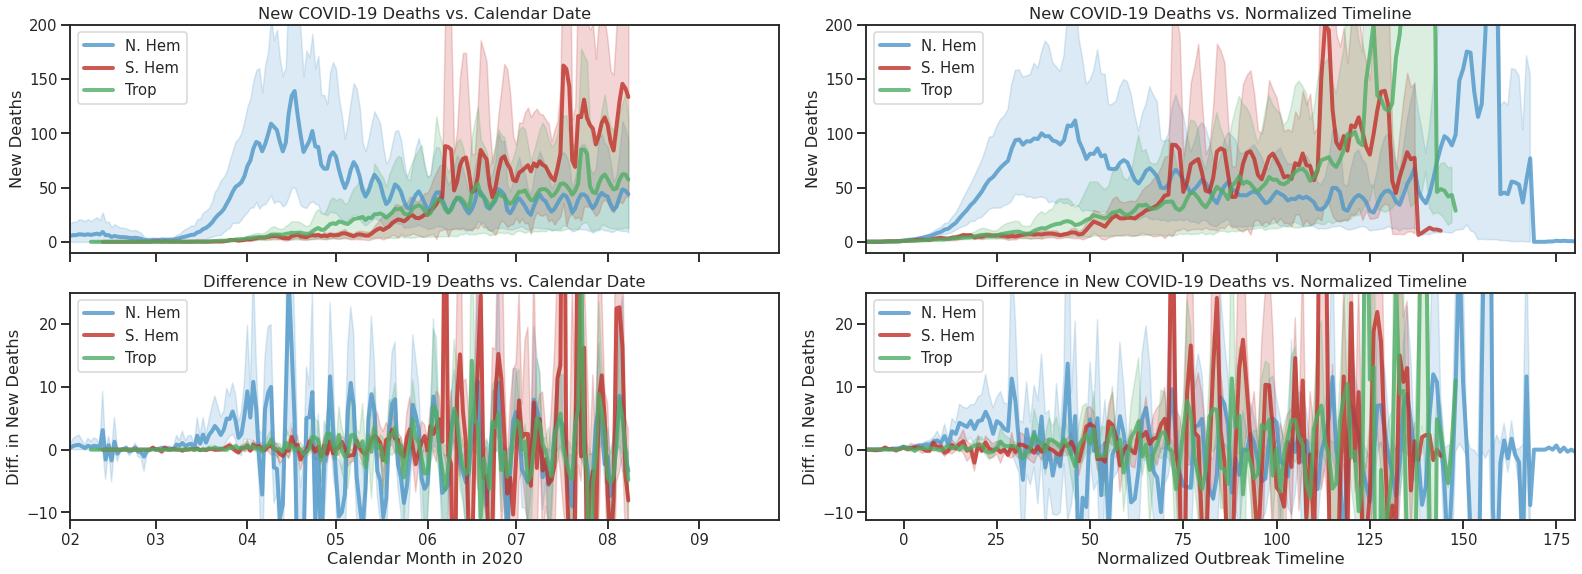

In [ ]:
# Timeseries plots of new deaths and new deaths difference -> broken apart and labeled by region 

# Initialize figure
fig,ax = plt.subplots(2,2,figsize=(22,8),sharex='col')

# New Deaths  
sns.lineplot(x=pd.to_datetime(df7all[df7all['Region']=='n_hem']['Date'],yearfirst=True,dayfirst=False),y='new_deaths',data=df7all[df7all['Region']=='n_hem'],ax=ax[0,0],label='N. Hem',color=sns.color_palette(palette='Blues_d',n_colors=4)[1],linewidth=4,alpha=0.8)
sns.lineplot(x=pd.to_datetime(df7all[df7all['Region']=='s_hem']['Date'],yearfirst=True,dayfirst=False),y='new_deaths',data=df7all[df7all['Region']=='s_hem'],ax=ax[0,0],label='S. Hem',color=sns.color_palette(palette='Reds_d',n_colors=4)[2],linewidth=4,alpha=0.8)
sns.lineplot(x=pd.to_datetime(df7all[df7all['Region']=='trop']['Date'],yearfirst=True,dayfirst=False),y='new_deaths',data=df7all[df7all['Region']=='trop'],ax=ax[0,0],label='Trop',color=sns.color_palette(palette='Greens_d',n_colors=4)[1],linewidth=4,alpha=0.8)

sns.lineplot(x='Days From 5th Death',y='new_deaths',data=df7all[df7all['Region']=='n_hem'],ax=ax[0,1],label='N. Hem',color=sns.color_palette(palette='Blues_d',n_colors=4)[1],linewidth=4,alpha=0.8)
sns.lineplot(x='Days From 5th Death',y='new_deaths',data=df7all[df7all['Region']=='s_hem'],ax=ax[0,1],label='S. Hem',color=sns.color_palette(palette='Reds_d',n_colors=4)[2],linewidth=4,alpha=0.8)
sns.lineplot(x='Days From 5th Death',y='new_deaths',data=df7all[df7all['Region']=='trop'],ax=ax[0,1],label='Trop',color=sns.color_palette(palette='Greens_d',n_colors=4)[1],linewidth=4,alpha=0.8)

ax[0,0].set_title('New COVID-19 Deaths vs. Calendar Date'); ax[0,1].set_title('New COVID-19 Deaths vs. Normalized Timeline')
ax[0,0].set_ylim(-200*0.05,200); ax[0,1].set_ylim(-200*0.05,200); 
[ax[0,c].set_ylabel('New Deaths') for c in np.arange(0,2)]


# New Deaths Difference
sns.lineplot(x=pd.to_datetime(df7all[df7all['Region']=='n_hem']['Date'],yearfirst=True,dayfirst=False),y='new_deaths_diff',data=df7all[df7all['Region']=='n_hem'],ax=ax[1,0],label='N. Hem',color=sns.color_palette(palette='Blues_d',n_colors=4)[1],linewidth=4,alpha=0.8)
sns.lineplot(x=pd.to_datetime(df7all[df7all['Region']=='s_hem']['Date'],yearfirst=True,dayfirst=False),y='new_deaths_diff',data=df7all[df7all['Region']=='s_hem'],ax=ax[1,0],label='S. Hem',color=sns.color_palette(palette='Reds_d',n_colors=4)[2],linewidth=4,alpha=0.8)
sns.lineplot(x=pd.to_datetime(df7all[df7all['Region']=='trop']['Date'],yearfirst=True,dayfirst=False),y='new_deaths_diff',data=df7all[df7all['Region']=='trop'],ax=ax[1,0],label='Trop',color=sns.color_palette(palette='Greens_d',n_colors=4)[1],linewidth=4,alpha=0.8)

sns.lineplot(x='Days From 5th Death',y='new_deaths_diff',data=df7all[df7all['Region']=='n_hem'],ax=ax[1,1],label='N. Hem',color=sns.color_palette(palette='Blues_d',n_colors=4)[1],linewidth=4,alpha=0.8)
sns.lineplot(x='Days From 5th Death',y='new_deaths_diff',data=df7all[df7all['Region']=='s_hem'],ax=ax[1,1],label='S. Hem',color=sns.color_palette(palette='Reds_d',n_colors=4)[2],linewidth=4,alpha=0.8)
sns.lineplot(x='Days From 5th Death',y='new_deaths_diff',data=df7all[df7all['Region']=='trop'],ax=ax[1,1],label='Trop',color=sns.color_palette(palette='Greens_d',n_colors=4)[1],linewidth=4,alpha=0.8)

ax[1,0].set_title('Difference in New COVID-19 Deaths vs. Calendar Date'); ax[1,1].set_title('Difference in New COVID-19 Deaths vs. Normalized Timeline')
ax[1,0].set_ylim(-25*0.45,25); ax[1,1].set_ylim(-25*0.45,25); 
[ax[1,c].set_ylabel('Diff. in New Deaths') for c in np.arange(0,2)]


# Shared attributes 
[ax.legend(loc='upper left') for ax in plt.gcf().axes]
[ax[r,0].set_xlim([datetime.date(2020, 2, 1), datetime.date(2020, 9, 28)]) for r in np.arange(0,2)]
[ax[r,0].xaxis.set_major_formatter(md.DateFormatter('%m')) for r in np.arange(0,2)]
[ax[r,1].set_xlim(-10,180) for r in np.arange(0,2)]
ax[1,0].set_xlabel('Calendar Month in 2020'); ax[1,1].set_xlabel('Normalized Outbreak Timeline')

fig.tight_layout(pad=0.5, w_pad=1.5, h_pad=0.8)

# from google.colab import files
# filename = ('Figure_NewDeaths_NewDeathsDiff_Timeseries_All_NH_SH_Trop.png')
# fig.savefig(filename, dpi=500)
# files.download(filename) 

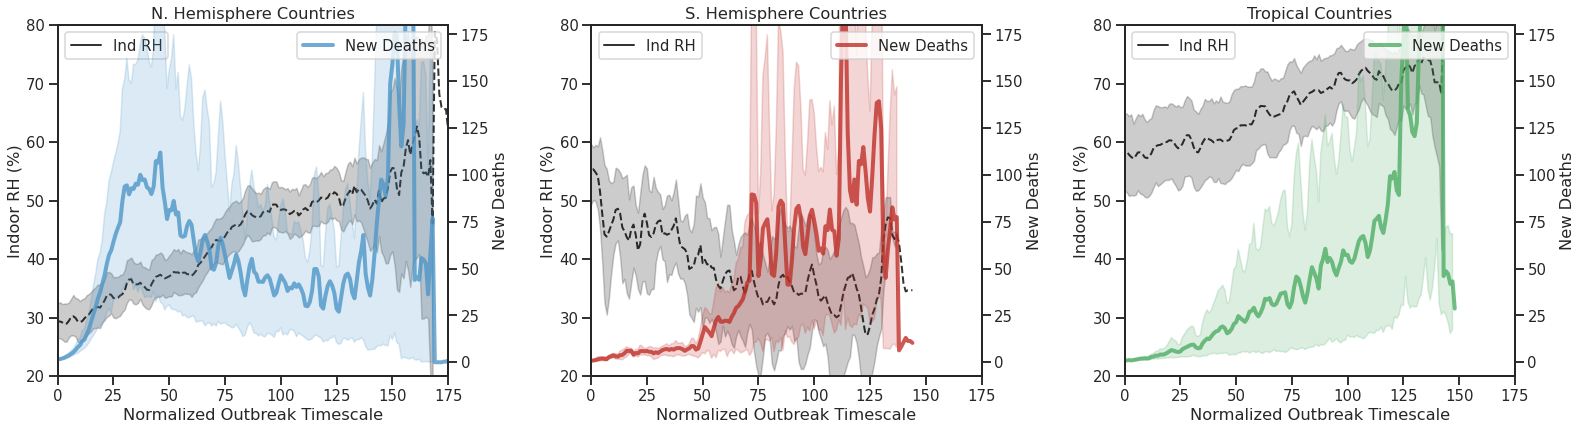

In [ ]:
# Compare new deaths and indoor climate 

fig,ax = plt.subplots(1,3,figsize=(22,6))

# N. Hemisphere 
ax0 = ax[0].twinx()
sns.lineplot(x='Days From 5th Death',y='IndoorRH_pct',data=df7all[df7all['Region']=='n_hem'],ax=ax[0],label='Ind RH',color='black',linewidth=2,alpha=0.8)#,style=True,dashes=[(2,2)])
sns.lineplot(x='Days From 5th Death',y='new_deaths',data=df7all[df7all['Region']=='n_hem'],ax=ax0,label='New Deaths',color=sns.color_palette(palette='Blues_d',n_colors=4)[1],linewidth=4,alpha=0.8)
ax[0].set_ylim(20,80)
ax0.set_ylim(-7.5,180)
ax[0].legend(loc='upper left')
ax0.legend(loc='upper right')
ax[0].lines[0].set_linestyle("--")

# S. Hemisphere 
ax1 = ax[1].twinx()
sns.lineplot(x='Days From 5th Death',y='IndoorRH_pct',data=df7all[df7all['Region']=='s_hem'],ax=ax[1],label='Ind RH',color='black',linewidth=2,alpha=0.8)
sns.lineplot(x='Days From 5th Death',y='new_deaths',data=df7all[df7all['Region']=='s_hem'],ax=ax1,label='New Deaths',color=sns.color_palette(palette='Reds_d',n_colors=4)[2],linewidth=4,alpha=0.8)
ax[1].set_ylim(20,80)
ax1.set_ylim(-7.5,180)
ax[1].legend(loc='upper left')
ax1.legend(loc='upper right')
ax[1].lines[0].set_linestyle("--")


# Trop
ax2 = ax[2].twinx()
sns.lineplot(x='Days From 5th Death',y='IndoorRH_pct',data=df7all[df7all['Region']=='trop'],ax=ax[2],label='Ind RH',color='black',linewidth=2,alpha=0.8)
sns.lineplot(x='Days From 5th Death',y='new_deaths',data=df7all[df7all['Region']=='trop'],ax=ax2,label='New Deaths',color=sns.color_palette(palette='Greens_d',n_colors=4)[1],linewidth=4,alpha=0.8)
ax[2].set_ylim(20,80)
ax2.set_ylim(-7.5,180)
ax[2].legend(loc='upper left')
ax2.legend(loc='upper right')
ax[2].lines[0].set_linestyle("--")


# Labels & Titles 
ax[0].set_title('N. Hemisphere Countries'); ax[1].set_title('S. Hemisphere Countries'); ax[2].set_title('Tropical Countries')
ax[0].set_ylabel('Indoor RH (%)'); ax[1].set_ylabel('Indoor RH (%)'); ax[2].set_ylabel('Indoor RH (%)')
ax0.set_ylabel('New Deaths'); ax1.set_ylabel('New Deaths'); ax2.set_ylabel('New Deaths')

[ax.set_xlabel('Normalized Outbreak Timescale') for ax in plt.gcf().axes]
[ax.set_xlim(0,175) for ax in plt.gcf().axes]
fig.tight_layout(pad=0.5, w_pad=2, h_pad=0.8)

# from google.colab import files
# filename = ('Figure_OutbreakMetrics_and_IndoorRH_Timeseries_All_NH_SH_Trop.png')
# fig.savefig(filename, dpi=500)
# files.download(filename) 

In [ ]:
# Function to create lags of a given variable 

def make_lags(dataframe,merging_var,variable,num_lags):
  df = dataframe[['Country',merging_var,variable]].copy() # Make a copy of the country (for grouping) and the variable to be lagged  

  for i in range(1,num_lags+1):
    df[variable+'_lag{}'.format(i)] = df.groupby('Country')[variable].shift(i) # Create all of the lags of the given input variable 

  return df

In [ ]:
# Function to create a dataframe with lagged versions of the variable and the actual outbreak metrics 

def lagged_var_df(dataframe,merging_var,variable,num_lags,COVIDstats):

  df = dataframe.copy()

  outcomes = df[COVIDstats]

  lagged_variables = make_lags(dataframe,merging_var,variable,num_lags)

  merged = lagged_variables.merge(right=outcomes,how='left',on=['Country',merging_var])

  return merged

In [ ]:
# Create a dataframe with lagged indoor humidity (from 0 days of lag up to 28 days of lag)
COVIDstats = ['Country','Days From 5th Death','total_cases', 'total_cases_per_million', 'new_cases', # Add country and date so there can be correct merging on keys 
       'new_cases_per_million', 'total_deaths', 'total_deaths_per_million',
       'total_deaths_pctchange', 'total_deaths_per_million_pctchange',
       'new_deaths', 'new_deaths_per_million', 'new_deaths_diff',
       'new_deaths_per_million_diff', 'new_deaths_pctchange',
       'new_deaths_per_million_pctchange']

df7all_lag_indrh = lagged_var_df(df7all,'Days From 5th Death','IndoorRH_pct',28,COVIDstats)

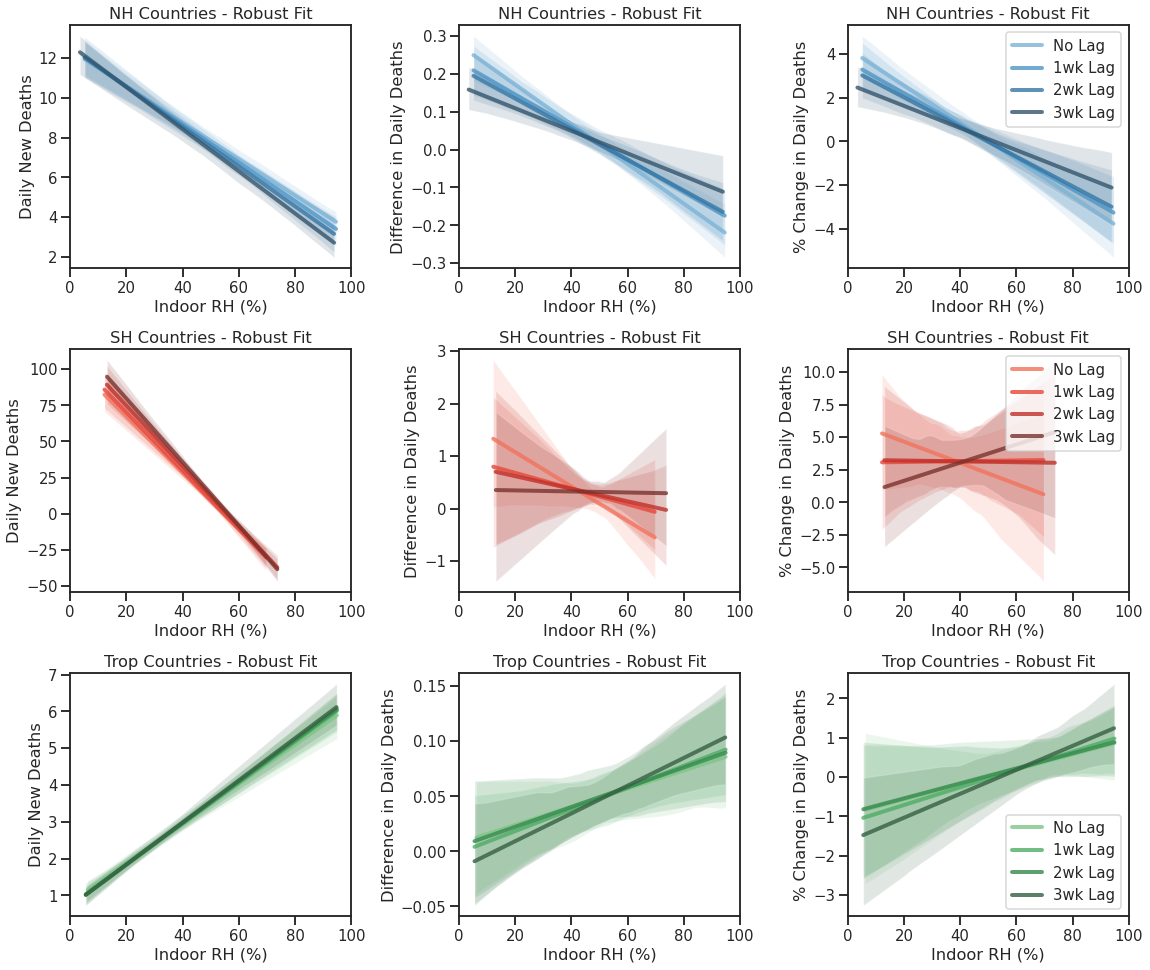

In [ ]:
first_day = 0; last_day = 180 

#all_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=first_day) & (df7all_lag_indrh['Days From 5th Death']<=150)] 
nhem_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=first_day) & (df7all_lag_indrh['Days From 5th Death']<=last_day) & (df7all_lag_indrh['Country'].isin(n_hem['Country'].unique()))]
shem_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=first_day) & (df7all_lag_indrh['Days From 5th Death']<=last_day) & (df7all_lag_indrh['Country'].isin(s_hem['Country'].unique()))]
trop_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=first_day) & (df7all_lag_indrh['Days From 5th Death']<=last_day) & (df7all_lag_indrh['Country'].isin(trop['Country'].unique()))]

outcomes = ['new_deaths','new_deaths_diff','new_deaths_pctchange']
rows = 3; cols = len(outcomes); fig,ax=plt.subplots(rows,cols,figsize=(16,13.5))

# Go through each quantized outbreak metric and make plots 
for col in range(0,cols): 

  # # LOWESS for all countries 
  # #sns.regplot(x='IndoorRH_pct',y=outcomes[col],data=all_forplot,ax=ax[0,col],robust=True,n_boot=100,label='No Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greys_d',n_colors=4)[0])
  # sns.regplot(x='IndoorRH_pct_lag7',y=outcomes[col],data=all_forplot,ax=ax[0,col],robust=True,n_boot=100,label='1wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greys_d',n_colors=4)[1]) 
  # sns.regplot(x='IndoorRH_pct_lag14',y=outcomes[col],data=all_forplot,ax=ax[0,col],robust=True,n_boot=100,label='2wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greys_d',n_colors=4)[2])
  # sns.regplot(x='IndoorRH_pct_lag21',y=outcomes[col],data=all_forplot,ax=ax[0,col],robust=True,n_boot=100,label='3wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greys_d',n_colors=4)[3])

  # LOWESS for n hem countries 
  sns.regplot(x='IndoorRH_pct',y=outcomes[col],data=nhem_forplot,ax=ax[0,col],robust=True,n_boot=100,label='No Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[0])
  sns.regplot(x='IndoorRH_pct_lag7',y=outcomes[col],data=nhem_forplot,ax=ax[0,col],robust=True,n_boot=100,label='1wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[1]) 
  sns.regplot(x='IndoorRH_pct_lag14',y=outcomes[col],data=nhem_forplot,ax=ax[0,col],robust=True,n_boot=100,label='2wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[2])
  sns.regplot(x='IndoorRH_pct_lag21',y=outcomes[col],data=nhem_forplot,ax=ax[0,col],robust=True,n_boot=100,label='3wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[3])

  # LOWESS for s hem countries 
  sns.regplot(x='IndoorRH_pct',y=outcomes[col],data=shem_forplot,ax=ax[1,col],robust=True,n_boot=100,label='No Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[0])
  sns.regplot(x='IndoorRH_pct_lag7',y=outcomes[col],data=shem_forplot,ax=ax[1,col],robust=True,n_boot=100,label='1wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[1]) 
  sns.regplot(x='IndoorRH_pct_lag14',y=outcomes[col],data=shem_forplot,ax=ax[1,col],robust=True,n_boot=100,label='2wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[2])
  sns.regplot(x='IndoorRH_pct_lag21',y=outcomes[col],data=shem_forplot,ax=ax[1,col],robust=True,n_boot=100,label='3wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[3])

  # LOWESS for trop countries 
  sns.regplot(x='IndoorRH_pct',y=outcomes[col],data=trop_forplot,ax=ax[2,col],robust=True,n_boot=100,label='No Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[0])
  sns.regplot(x='IndoorRH_pct_lag7',y=outcomes[col],data=trop_forplot,ax=ax[2,col],robust=True,n_boot=100,label='1wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[1]) 
  sns.regplot(x='IndoorRH_pct_lag14',y=outcomes[col],data=trop_forplot,ax=ax[2,col],robust=True,n_boot=100,label='2wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[2])
  sns.regplot(x='IndoorRH_pct_lag21',y=outcomes[col],data=trop_forplot,ax=ax[2,col],robust=True,n_boot=100,label='3wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[3])

[ax[r,2].legend(loc='upper right') for r in np.arange(0,2)]; ax[2,2].legend(loc='lower right') 

[ax.set_xlim(0,100) for ax in plt.gcf().axes]

[ax[r,0].set_xlabel('Indoor RH (%)') for r in np.arange(0,3)]
[ax[r,1].set_xlabel('Indoor RH (%)') for r in np.arange(0,3)]
[ax[r,2].set_xlabel('Indoor RH (%)') for r in np.arange(0,3)]

[ax[r,0].set_ylabel('Daily New Deaths') for r in np.arange(0,3)]
[ax[r,1].set_ylabel('Difference in Daily Deaths') for r in np.arange(0,3)]
[ax[r,2].set_ylabel('% Change in Daily Deaths') for r in np.arange(0,3)]

# ax[0,0].set_title('All Countries - Robust Fit')
# ax[0,1].set_title('All Countries - Robust Fit')
# ax[0,2].set_title('All Countries - Robust Fit')

ax[0,0].set_title('NH Countries - Robust Fit')
ax[0,1].set_title('NH Countries - Robust Fit')
ax[0,2].set_title('NH Countries - Robust Fit')

ax[1,0].set_title('SH Countries - Robust Fit')
ax[1,1].set_title('SH Countries - Robust Fit')
ax[1,2].set_title('SH Countries - Robust Fit')

ax[2,0].set_title('Trop Countries - Robust Fit')
ax[2,1].set_title('Trop Countries - Robust Fit')
ax[2,2].set_title('Trop Countries - Robust Fit')

fig.tight_layout(pad=0.5,h_pad=1,w_pad=1)

# from google.colab import files
# filename = ('Figure_Robust_DroppedCases_NH_SH_Trop.png')
# fig.savefig(filename, dpi=500)
# files.download(filename) 

In [ ]:
def lowess_with_ci(dataset, xcol, ycol, n_boot, ):
  
  # Import statsmodels api and instantiate the lowess model 
  import statsmodels.api as sm; lowess = sm.nonparametric.lowess

  # Get input and output data vectors 
  df = dataset.dropna().copy(); input=df[xcol]; output=df[ycol] 

  # Dataframe to be used for index matching (bootstrapping uses sampling with replacement, so you'll have duplicates of some indices and missing values at other indices, need a way to match back with original df)
  df_for_index_matching = df[input.name].reset_index()

  # Number of bootstraps and number of samples for each bootstrap (equal to number of samples in vector) 
  n_boot=5; n=len(output)

  bootstrapped_lowess_fits = [] # to hold all of the index-matched lowess fits on the resampled datasets 
  rng = np.random.default_rng(None) # random number generator 
  for i in range(int(n_boot)): 
    resampler = rng.integers(0, n, n, dtype=np.intp) # get random indices -> use these to extract index-matched pairs of xvals and yvals from your input and output vectors 

    resampled_output = output.take(resampler, axis=0) # extract resampled outputs (w/ replacement)

    resampled_input = input.take(resampler, axis=0) # extract resampled inputs (w/ replacement)

    lowess_on_resampled_data = lowess(endog=resampled_output,exog=resampled_input) # use resampled (w/ replacement) dataset to compute a new lowess fit 

    lowess_on_resampled_data_df = pd.DataFrame(data=lowess_on_resampled_data,columns=['input','predicted_output']).set_index('input').drop_duplicates().reset_index() # turn the array into a labeled dataframe and drop duplicated inputs (since you sample with replacement, you'll have duplicated inputs)

    lowess_matched_to_original_data_indices = df_for_index_matching.merge(lowess_on_resampled_data_df.rename(columns={'input':input.name}),how='left')['predicted_output'] # Use the original data vector to match the lowess to the right indices (since you sample with replacement and therefore don't use all of the unique input values)

    bootstrapped_lowess_fits.append(lowess_matched_to_original_data_indices) # Add the index-matched lowess fit to the list 

  full_lowess = pd.DataFrame(lowess(endog=output,exog=input),columns=[input.name,'predicted_output_full']) # final lowess fitting on the entire dataset (no bootstrapping/resampling, use all datapoints once) 

  full_lowess = df_for_index_matching.merge(full_lowess,how='left',on=input.name).drop(columns='index') # Need to match the lowess results to the right index (and corresponding input value) 

  lowess_with_bootstrap = pd.concat([full_lowess,pd.concat(bootstrapped_lowess_fits,axis=1)],axis=1) # Combine the full (all datapoints) lowess fit with the bootstrapped (subsampled) lowess fits 

  lowess_with_bootstrap.loc[:,'uppercl'] = lowess_with_bootstrap.iloc[:,1:].quantile(q=0.975,axis=1) # get the 97.5 percentile for the bootstrapped fits (upper bound for 95% ci)

  lowess_with_bootstrap.loc[:,'lowercl'] = lowess_with_bootstrap.iloc[:,1:].quantile(q=0.025,axis=1) # get the 2.5 percentile for the bootstrapped fits (lower bound for 95% ci)

  lowess_with_bootstrap.sort_values(by=input.name,inplace=True) # sort the values by input so that the fill_between function works properly 

  from scipy.signal import savgol_filter

  lowess_with_bootstrap.loc[:,'uppercl_smooth'] = savgol_filter(lowess_with_bootstrap['uppercl'], 15, 2) # smooth the upper confidence interval 

  lowess_with_bootstrap.loc[:,'lowercl_smooth'] = savgol_filter(lowess_with_bootstrap['lowercl'], 15, 2) # smooth the lower confidence interval 

  return lowess_with_bootstrap[[input.name,'predicted_output_full','uppercl','lowercl','uppercl_smooth','lowercl_smooth']]

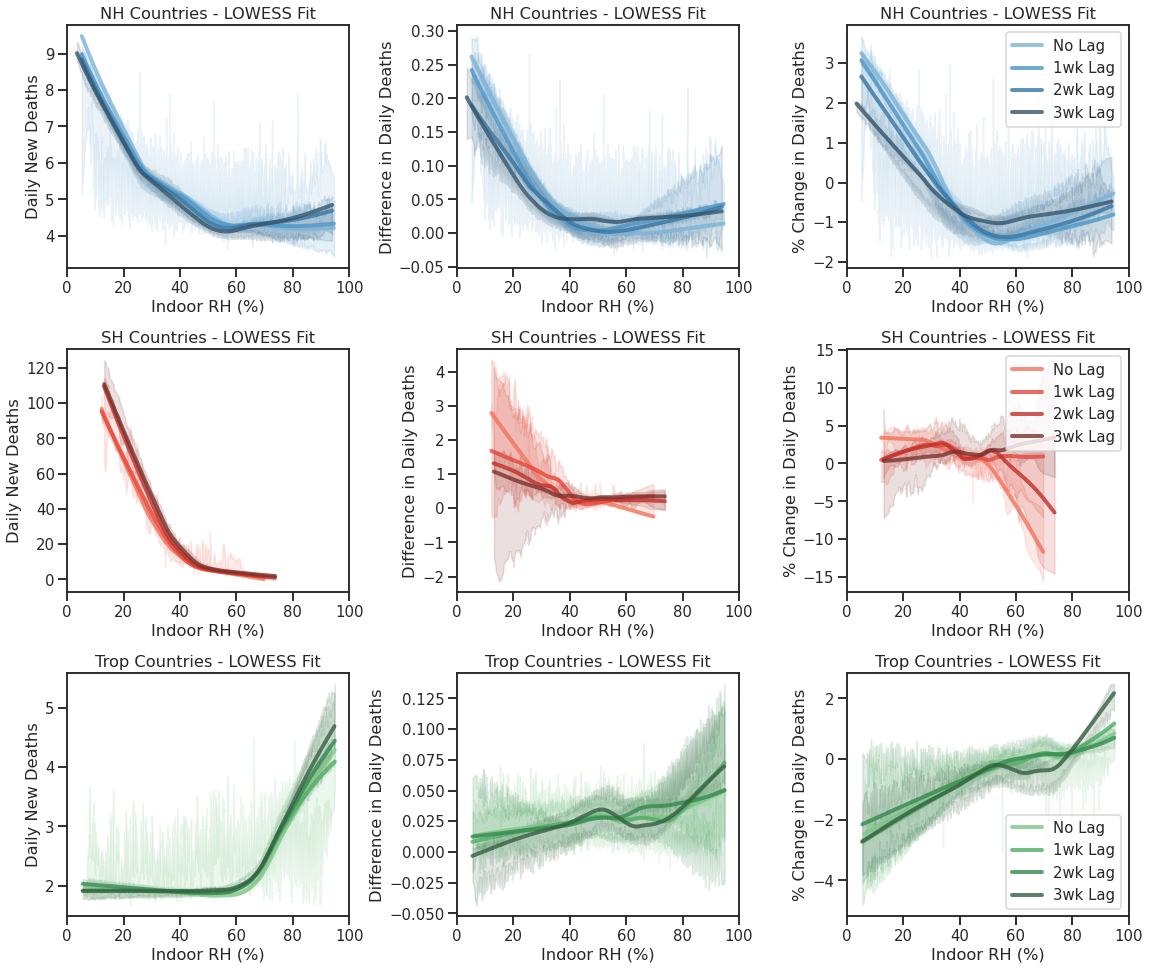

In [ ]:
first_day = 0; last_day = 180 

nhem_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=first_day) & (df7all_lag_indrh['Days From 5th Death']<=last_day) & (df7all_lag_indrh['Country'].isin(n_hem['Country'].unique()))]
shem_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=first_day) & (df7all_lag_indrh['Days From 5th Death']<=last_day) & (df7all_lag_indrh['Country'].isin(s_hem['Country'].unique()))]
trop_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=first_day) & (df7all_lag_indrh['Days From 5th Death']<=last_day) & (df7all_lag_indrh['Country'].isin(trop['Country'].unique()))]

outcomes = ['new_deaths','new_deaths_diff','new_deaths_pctchange']
rows = 3; cols = len(outcomes); fig,ax=plt.subplots(rows,cols,figsize=(16,13.5))

# Go through each quantized outbreak metric and make plots 
for col in range(0,cols): 

  n_boot = 100; # Number of bootstraps to complete for each lowess fit 

  # LOWESS for n hem countries 
  sns.regplot(x='IndoorRH_pct',y=outcomes[col],data=nhem_forplot,ax=ax[0,col],lowess=True,label='No Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[0])
  lowess_conf_intervals = lowess_with_ci(dataset=nhem_forplot, xcol='IndoorRH_pct', ycol=outcomes[col], n_boot=n_boot)
  ax[0,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Blues_d',n_colors=4)[0])

  sns.regplot(x='IndoorRH_pct_lag7',y=outcomes[col],data=nhem_forplot,ax=ax[0,col],lowess=True,label='1wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[1]) 
  lowess_conf_intervals = lowess_with_ci(dataset=nhem_forplot, xcol='IndoorRH_pct_lag7', ycol=outcomes[col], n_boot=n_boot)
  ax[0,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag7'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Blues_d',n_colors=4)[1])

  sns.regplot(x='IndoorRH_pct_lag14',y=outcomes[col],data=nhem_forplot,ax=ax[0,col],lowess=True,label='2wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[2])
  lowess_conf_intervals = lowess_with_ci(dataset=nhem_forplot, xcol='IndoorRH_pct_lag14', ycol=outcomes[col], n_boot=n_boot)
  ax[0,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag14'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Blues_d',n_colors=4)[2])

  sns.regplot(x='IndoorRH_pct_lag21',y=outcomes[col],data=nhem_forplot,ax=ax[0,col],lowess=True,label='3wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[3])
  lowess_conf_intervals = lowess_with_ci(dataset=nhem_forplot, xcol='IndoorRH_pct_lag21', ycol=outcomes[col], n_boot=n_boot)
  ax[0,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag21'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Blues_d',n_colors=4)[3])

  # LOWESS for s hem countries 
  sns.regplot(x='IndoorRH_pct',y=outcomes[col],data=shem_forplot,ax=ax[1,col],lowess=True,label='No Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[0])
  lowess_conf_intervals = lowess_with_ci(dataset=shem_forplot, xcol='IndoorRH_pct', ycol=outcomes[col], n_boot=n_boot)
  ax[1,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Reds_d',n_colors=4)[0])

  sns.regplot(x='IndoorRH_pct_lag7',y=outcomes[col],data=shem_forplot,ax=ax[1,col],lowess=True,label='1wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[1]) 
  lowess_conf_intervals = lowess_with_ci(dataset=shem_forplot, xcol='IndoorRH_pct_lag7', ycol=outcomes[col], n_boot=n_boot)
  ax[1,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag7'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Reds_d',n_colors=4)[1])

  sns.regplot(x='IndoorRH_pct_lag14',y=outcomes[col],data=shem_forplot,ax=ax[1,col],lowess=True,label='2wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[2])
  lowess_conf_intervals = lowess_with_ci(dataset=shem_forplot, xcol='IndoorRH_pct_lag14', ycol=outcomes[col], n_boot=n_boot)
  ax[1,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag14'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Reds_d',n_colors=4)[2])

  sns.regplot(x='IndoorRH_pct_lag21',y=outcomes[col],data=shem_forplot,ax=ax[1,col],lowess=True,label='3wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[3])
  lowess_conf_intervals = lowess_with_ci(dataset=shem_forplot, xcol='IndoorRH_pct_lag21', ycol=outcomes[col], n_boot=n_boot)
  ax[1,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag21'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Reds_d',n_colors=4)[3])


  # LOWESS for trop countries 
  sns.regplot(x='IndoorRH_pct',y=outcomes[col],data=trop_forplot,ax=ax[2,col],lowess=True,label='No Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[0])
  lowess_conf_intervals = lowess_with_ci(dataset=trop_forplot, xcol='IndoorRH_pct', ycol=outcomes[col], n_boot=n_boot)
  ax[2,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Greens_d',n_colors=4)[0])

  sns.regplot(x='IndoorRH_pct_lag7',y=outcomes[col],data=trop_forplot,ax=ax[2,col],lowess=True,label='1wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[1]) 
  lowess_conf_intervals = lowess_with_ci(dataset=trop_forplot, xcol='IndoorRH_pct_lag7', ycol=outcomes[col], n_boot=n_boot)
  ax[2,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag7'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Greens_d',n_colors=4)[1])

  sns.regplot(x='IndoorRH_pct_lag14',y=outcomes[col],data=trop_forplot,ax=ax[2,col],lowess=True,label='2wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[2])
  lowess_conf_intervals = lowess_with_ci(dataset=trop_forplot, xcol='IndoorRH_pct_lag14', ycol=outcomes[col], n_boot=n_boot)
  ax[2,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag14'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Greens_d',n_colors=4)[2])

  sns.regplot(x='IndoorRH_pct_lag21',y=outcomes[col],data=trop_forplot,ax=ax[2,col],lowess=True,label='3wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[3])
  lowess_conf_intervals = lowess_with_ci(dataset=trop_forplot, xcol='IndoorRH_pct_lag21', ycol=outcomes[col], n_boot=n_boot)
  ax[2,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag21'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Greens_d',n_colors=4)[3])

[ax[r,2].legend(loc='upper right') for r in np.arange(0,2)]; ax[2,2].legend(loc='lower right') 

[ax.set_xlim(0,100) for ax in plt.gcf().axes]

[ax[r,0].set_xlabel('Indoor RH (%)') for r in np.arange(0,3)]
[ax[r,1].set_xlabel('Indoor RH (%)') for r in np.arange(0,3)]
[ax[r,2].set_xlabel('Indoor RH (%)') for r in np.arange(0,3)]

[ax[r,0].set_ylabel('Daily New Deaths') for r in np.arange(0,3)]
[ax[r,1].set_ylabel('Difference in Daily Deaths') for r in np.arange(0,3)]
[ax[r,2].set_ylabel('% Change in Daily Deaths') for r in np.arange(0,3)]

ax[0,0].set_title('NH Countries - LOWESS Fit')
ax[0,1].set_title('NH Countries - LOWESS Fit')
ax[0,2].set_title('NH Countries - LOWESS Fit')

ax[1,0].set_title('SH Countries - LOWESS Fit')
ax[1,1].set_title('SH Countries - LOWESS Fit')
ax[1,2].set_title('SH Countries - LOWESS Fit')

ax[2,0].set_title('Trop Countries - LOWESS Fit')
ax[2,1].set_title('Trop Countries - LOWESS Fit')
ax[2,2].set_title('Trop Countries - LOWESS Fit')

fig.tight_layout(pad=0.5,h_pad=1,w_pad=1)

# from google.colab import files
# filename = ('Figure_LOWESS_DroppedCases_NH_SH_Trop_WITHConfIntervals.png')
# fig.savefig(filename, dpi=500)
# files.download(filename) 

In [ ]:
def quantizer(dataframe, first_day, last_day, qlevels, countries, retbins):

  # Dataframe to use for plotting -> Set lower and upper bound for days from 5th death, only use the selected list of countries (could be all, n_hem, s_hem, trop, or for a given month)
  df = dataframe[(dataframe['Days From 5th Death'].ge(first_day)) & (dataframe['Days From 5th Death'].le(last_day)) & (dataframe['Country'].isin(countries))].copy()

  if retbins == True: # return the bin ranges and label each category with the bin range 
    # Apply qcut to break the outbreak metrics into different evenly-distributed quantiles 
    df.loc[:,'new_cases_Qlevels'] = pd.qcut(x=df.loc[:,'new_cases'],q=qlevels,retbins=True,precision=1,duplicates='drop')[0]
    df.loc[:,'new_deaths_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths'],q=qlevels,retbins=True,precision=1,duplicates='drop')[0]
    df.loc[:,'new_deaths_diff_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths_diff'],q=qlevels,retbins=True,precision=1,duplicates='drop')[0]
    df.loc[:,'new_deaths_pctchange_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths_pctchange'],q=qlevels,retbins=True,precision=1,duplicates='drop')[0]
  
  else: # don't retun the bin ranges and label each category with an integer
    # Apply qcut to break the outbreak metrics into different evenly-distributed quantiles 
    df.loc[:,'new_cases_Qlevels'] = pd.qcut(x=df.loc[:,'new_cases'],q=qlevels,duplicates='drop',labels=False).astype('category')
    df.loc[:,'new_deaths_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths'],q=qlevels,duplicates='drop',labels=False).astype('category')
    df.loc[:,'new_deaths_diff_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths_diff'],q=qlevels,duplicates='drop',labels=False).astype('category')
    df.loc[:,'new_deaths_pctchange_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths_pctchange'],q=qlevels,duplicates='drop',labels=False).astype('category')

  return df

In [ ]:
# Function for changing seaborn barplot width 
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

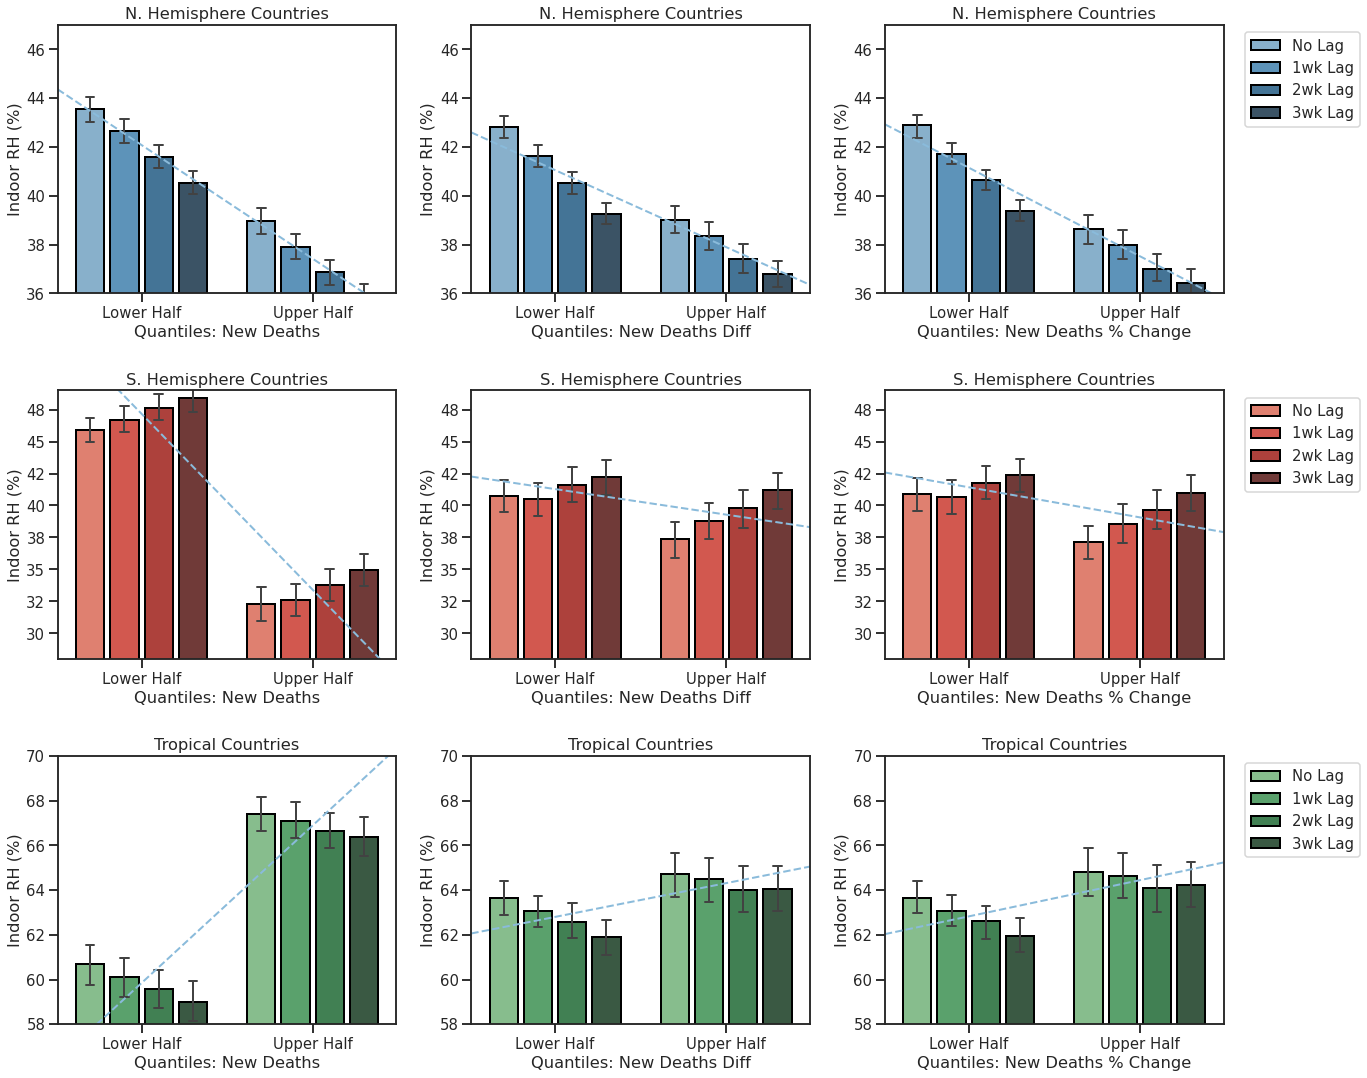

In [ ]:
first_day = 0; last_day = 180; qlevels = 2; # Parameters for quantizing the dataset 

qtotal = quantizer(dataframe=df7all_lag_indrh, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False) # quantize all outbreaks
qnhem = quantizer(dataframe=df7all_lag_indrh, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=n_hem['Country'].unique(), retbins=False) # quantize the N. Hem outbreaks 
qshem = quantizer(dataframe=df7all_lag_indrh, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=s_hem['Country'].unique(), retbins=False) # quantize the S. Hem outbreaks 
qtrop = quantizer(dataframe=df7all_lag_indrh, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=trop['Country'].unique(), retbins=False) # quantize the Trop outbreaks 


# Set up the plotting 
quantized_outcomes = ['new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
rows = 3; cols = len(quantized_outcomes); fig,ax=plt.subplots(rows,cols,figsize=(19,15))

# Go through each quantized outbreak metric and make plots 
for col in range(0,cols): 

  # All countries colored bar plots and best fit 
  #meltall = pd.melt(qtotal, id_vars=quantized_outcomes[col], value_vars=['IndoorRH_pct','IndoorRH_pct_lag7','IndoorRH_pct_lag14','IndoorRH_pct_lag21'])
  #sns.barplot(x=quantized_outcomes[col], y='value', hue='variable', data=meltall,ax=ax[0,col],capsize=.05,errwidth=2,edgecolor='black',linewidth=2,palette=sns.color_palette(palette='Greys_d',n_colors=4))
  #sns.regplot(x=np.arange(0,len(meltall[quantized_outcomes[col]].cat.categories)),y=meltall.groupby(quantized_outcomes[col])['value'].mean().values,ci=None,line_kws={'linestyle': '--','linewidth':2},scatter=False,ax=ax[0,col],truncate=False)

  # Northern hemisphere colored bar plots and best fit 
  meltnhem = pd.melt(qnhem, id_vars=quantized_outcomes[col], value_vars=['IndoorRH_pct','IndoorRH_pct_lag7','IndoorRH_pct_lag14','IndoorRH_pct_lag21'])
  sns.barplot(x=quantized_outcomes[col], y='value', hue='variable', data=meltnhem,ax=ax[0,col],capsize=.05,errwidth=2,edgecolor='black',linewidth=2,palette=sns.color_palette(palette='Blues_d',n_colors=4))
  sns.regplot(x=np.arange(0,len(meltnhem[quantized_outcomes[col]].cat.categories)),y=meltnhem.groupby(quantized_outcomes[col])['value'].mean().values,ci=None,line_kws={'linestyle': '--','linewidth':2},scatter=False,ax=ax[0,col],truncate=False)

  # Southern hemisphere colored bar plots and best fit 
  meltshem = pd.melt(qshem, id_vars=quantized_outcomes[col], value_vars=['IndoorRH_pct','IndoorRH_pct_lag7','IndoorRH_pct_lag14','IndoorRH_pct_lag21'])
  sns.barplot(x=quantized_outcomes[col], y='value', hue='variable', data=meltshem,ax=ax[1,col],capsize=.05,errwidth=2,edgecolor='black',linewidth=2,palette=sns.color_palette(palette='Reds_d',n_colors=4))
  sns.regplot(x=np.arange(0,len(meltshem[quantized_outcomes[col]].cat.categories)),y=meltshem.groupby(quantized_outcomes[col])['value'].mean().values,ci=None,line_kws={'linestyle': '--','linewidth':2},scatter=False,ax=ax[1,col],truncate=False)

  # Tropical colored bar plots and best fit 
  melttrop = pd.melt(qtrop, id_vars=quantized_outcomes[col], value_vars=['IndoorRH_pct','IndoorRH_pct_lag7','IndoorRH_pct_lag14','IndoorRH_pct_lag21'])
  sns.barplot(x=quantized_outcomes[col], y='value', hue='variable', data=melttrop,ax=ax[2,col],capsize=.05,errwidth=2,edgecolor='black',linewidth=2,palette=sns.color_palette(palette='Greens_d',n_colors=4))
  sns.regplot(x=np.arange(0,len(melttrop[quantized_outcomes[col]].cat.categories)),y=melttrop.groupby(quantized_outcomes[col])['value'].mean().values,ci=None,line_kws={'linestyle': '--','linewidth':2},scatter=False,ax=ax[2,col],truncate=False)

# Define custom plotting legends 
# Remove legends in the first 3 plots for all 3 rows 
[ax[r,c].get_legend().remove() for r in np.arange(0,3) for c in np.arange(0,3)] 
# Get handles and labels information for the legend, then use these same handles and specify custom label names and custom label location in the subsequent line
handles, labels = ax[0,2].get_legend_handles_labels(); ax[0,2].legend(handles, ['No Lag','1wk Lag','2wk Lag','3wk Lag'],bbox_to_anchor=(1.04,1), loc="upper left") # Rename the legend labels and place it outside of the figure
handles, labels = ax[1,2].get_legend_handles_labels(); ax[1,2].legend(handles, ['No Lag','1wk Lag','2wk Lag','3wk Lag'],bbox_to_anchor=(1.04,1), loc="upper left") # Rename the legend labels and place it outside of the figure
handles, labels = ax[2,2].get_legend_handles_labels(); ax[2,2].legend(handles, ['No Lag','1wk Lag','2wk Lag','3wk Lag'],bbox_to_anchor=(1.04,1), loc="upper left") # Rename the legend labels and place it outside of the figure
#handles, labels = ax[3,2].get_legend_handles_labels(); ax[3,2].legend(handles, ['No Lag','1wk Lag','2wk Lag','3wk Lag'],bbox_to_anchor=(1.04,1), loc="upper left") # Rename the legend labels and place it outside of the figure

# Define xlabels 
[ax[r,0].set_xlabel('Quantiles: New Deaths') for r in np.arange(0,3)]; [ax[r,1].set_xlabel('Quantiles: New Deaths Diff') for r in np.arange(0,3)]
[ax[r,2].set_xlabel('Quantiles: New Deaths % Change') for r in np.arange(0,3)]; #[ax[r,3].set_xlabel('Quantiles: New Deaths % Change') for r in np.arange(0,4)]

# Define ylabels 
[ax.set_ylabel('Indoor RH (%)') for ax in plt.gcf().axes]

# Define titles
#[ax[0,c].set_title('All Countries') for c in np.arange(0,3)]
[ax[0,c].set_title('N. Hemisphere Countries') for c in np.arange(0,3)]
[ax[1,c].set_title('S. Hemisphere Countries') for c in np.arange(0,3)]
[ax[2,c].set_title('Tropical Countries') for c in np.arange(0,3)]

# Define ylims 
# #[ax[0,c].set_ylim(42,52) for c in np.arange(0,3)]
[ax[0,c].set_ylim(36,47) for c in np.arange(0,3)]
[ax[1,c].set_ylim(28,49) for c in np.arange(0,3)]
[ax[2,c].set_ylim(58,70) for c in np.arange(0,3)]
[ax.set_xticklabels(['Lower Half','Upper Half']) for ax in plt.gcf().axes]

from matplotlib.ticker import FormatStrFormatter
[ax.yaxis.set_major_formatter(FormatStrFormatter('%.f')) for ax in plt.gcf().axes]

[change_width(ax, 0.165) for ax in plt.gcf().axes]
fig.tight_layout(pad=0.5,h_pad=2,w_pad=1.5)

# from google.colab import files
# filename = ('Figure_OutbreakQuantiles_Barplots_DroppedCases_NH_SH_Tr.png')
# fig.savefig(filename, dpi=500)
# files.download(filename) 

In [ ]:
# Discretize the treatment  
bins = [0,40,60,100] # How to break up the continuous variable (0-40),(40-60),(60-100)
labels = [0,1,2] # How to label the bins 
df7all_lag_indrh['quantized_IndRH'] = pd.cut(df7all_lag_indrh['IndoorRH_pct'],bins=bins,labels=labels) # Use cut to break up the continuous data 
df7all_lag_indrh['quantized_IndRH_lag7'] = pd.cut(df7all_lag_indrh['IndoorRH_pct_lag7'],bins=bins,labels=labels) # Use cut to break up the continuous data 
df7all_lag_indrh['quantized_IndRH_lag14'] = pd.cut(df7all_lag_indrh['IndoorRH_pct_lag14'],bins=bins,labels=labels) # Use cut to break up the continuous data 
df7all_lag_indrh['quantized_IndRH_lag21'] = pd.cut(df7all_lag_indrh['IndoorRH_pct_lag21'],bins=bins,labels=labels) # Use cut to break up the continuous data 

# Binarize the treatment (so <40 and >60 are untreated, 40-60 are treated) 
binary_treatment = df7all_lag_indrh.copy()
binary_treatment.loc[:,['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']] = binary_treatment.loc[:,['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']].replace(2,0)

# Binarize the outbreak metrics 
first_day = 0; last_day = 180; qlevels=2
df7all_lag_indrh_q = quantizer(dataframe=df7all_lag_indrh, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all_lag_indrh['Country'].unique(), retbins=False)
binary_treatment_q = quantizer(dataframe=binary_treatment, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all_lag_indrh['Country'].unique(), retbins=False)


In [ ]:
import statsmodels.api as sm

def oddsratio(dataset,outcome,treatment):
  
  data = dataset[[outcome,treatment]].copy() # Copy dataset 

  contig_table = pd.crosstab(data[outcome],data[treatment]).iloc[::-1,] # Make a 2x2 contingency table, 00 = Bad Outcome/No Treatment, 10 = Good Outcome/No Treatment, 01 = Bad Outcome/Treatment, 11 = Good Outcome/Treatment 
  #print(contig_table)

  table = sm.stats.Table2x2(np.asarray(contig_table)) # Use statsmodels to turn the contingency table into a special 2x2 table for further statsmodels calculations 
  #print(table)

  #table=sm.stats.Table2x2.from_data(data) # Make a contingency table, 00 = Bad Outcome/No Treatment, 10 = Good Outcome/No Treatment, 01 = Bad Outcome/Treatment, 11 = Good Outcome/Treatment 

  odds_badoutcome_notreatment = contig_table.iloc[0,0]/contig_table.iloc[1,0] # Odds of having a worse outcome (e.g. more deaths) WITHOUT treatment (e.g. RH<40% or RH>60%) 
  odds_badoutcome_withtreatment = contig_table.iloc[0,1]/contig_table.iloc[1,1] # Odds of having a worse outcome (e.g. more deaths) WITH treatment (e.g. RH 40%-60%) 

  odds_ratio = table.oddsratio # Odds ratio (ratio of odds_badoutcome_notreatment to odds_badoutcome_withtreatment) -> how much more likely are you to have a bad outcome if you don't receive the treatment 
  LCB = table.oddsratio_confint()[0] # Lower 95% confidence boundary
  UCB = table.oddsratio_confint()[1] # Upper 95% confidence boundary 
  pval = table.oddsratio_pvalue() # p-value for a hypothesis test about the odds ratio

  return odds_badoutcome_notreatment, odds_badoutcome_withtreatment, odds_ratio, LCB, UCB, pval 

# To run function... 
# oddsratio(dataset=treat_total,outcome='new_cases_Qlevels',treatment='quantized_IndRH')

In [ ]:
# Compute odds ratios by region (All Countries, NH, SH, Trop) 

first_day = 0; last_day = 180; qlevels=2
treat_total = quantizer(dataframe=binary_treatment, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_nhem = quantizer(dataframe=binary_treatment, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=n_hem['Country'].unique(), retbins=False).dropna()
treat_shem = quantizer(dataframe=binary_treatment, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=s_hem['Country'].unique(), retbins=False).dropna()
treat_trop = quantizer(dataframe=binary_treatment, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=trop['Country'].unique(), retbins=False).dropna()


quantized_outcomes = ['new_cases_Qlevels','new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']
dataset_list = [treat_total, treat_nhem, treat_shem, treat_trop]
dataset_names = ['All','NH','SH','Tro']


level3 = []
for outcome in quantized_outcomes: 

  level2 = []
  for humidity in quantized_humidities: 

    
    level1 = [] # Empty list to store each output from the primary calculations

    for dset in dataset_list: 

      computeOR = oddsratio(dataset=dset,outcome=outcome,treatment=humidity) # Compute the odds for NO treatment odds for WITH treatment, odds ratio, LCL, UCL, and pval

      level1.append(computeOR) # Append the output tuple to the list 

    df_level1 = pd.DataFrame(level1, columns =['oddsbad_NO_treatment', 'oddsbad_WITH_treatment', 'odds_ratio','LCL','UCL','pval'],index=dataset_names) # Put all outputs into a labeled dataframe

    level2.append(df_level1) # Put the labeled output dataframe (calculations for each region) into the list of dataframes in level 2 (calculations for each time-lagged humidity value) 
  
  df_level2 = pd.concat(level2,keys=quantized_humidities) # Put all dfs into a multi-index dataframe 

  level3.append(df_level2) # Put the multi-index dataframes (calcs for each region and each time-lag) into the list of dataframes in level 3(calculations for each COVID-19 outbreak metric) 

df_ORs_byregion = pd.concat(level3, keys=quantized_outcomes) # Put all of the multi-index dataframes into a final multi-index dataframe 

print('Done')

Done


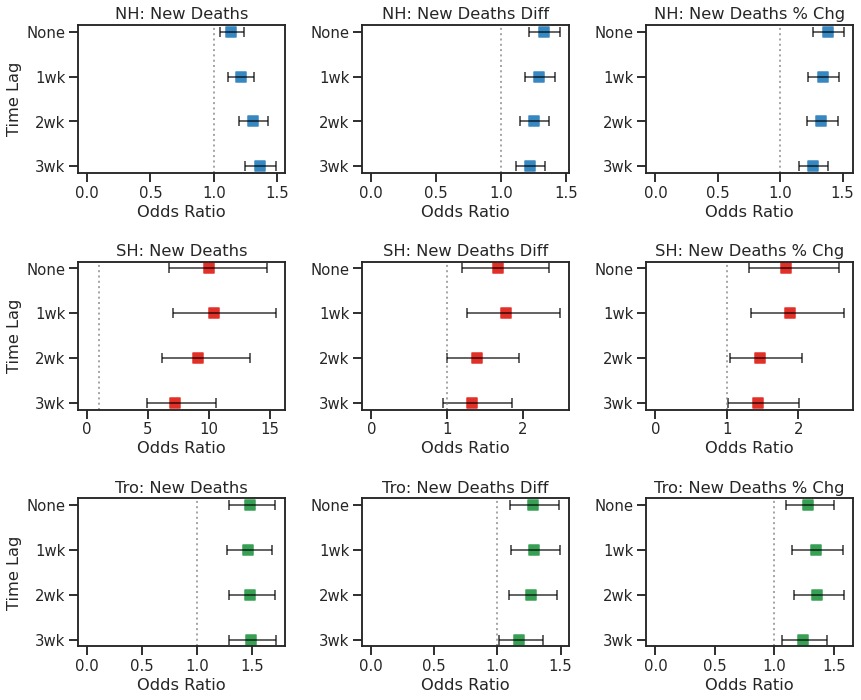

In [ ]:
# Set up the plotting 
quantized_outcomes = ['new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']
dataset_names = ['NH','SH','Tro']

rows = len(dataset_names); cols = len(quantized_outcomes); fig,ax=plt.subplots(rows,cols,figsize=(12,9.75))

points = []; lines=[]
# Go through each quantized outbreak metric and make plots 
for col in range(0,cols):
  for lag in range(len(quantized_humidities)):
    for region in range(len(dataset_names)):

      data_for_plotting = df_ORs_byregion.loc[(quantized_outcomes[col],quantized_humidities[lag],dataset_names[region])]
      ax[region,col].errorbar(x=data_for_plotting['odds_ratio'],y=lag,xerr=np.array([data_for_plotting['odds_ratio']-data_for_plotting['LCL'],data_for_plotting['UCL']-data_for_plotting['odds_ratio']]).reshape(-1,1),capsize=5,capthick=2,elinewidth=2,ecolor='k',alpha=0.6,dash_capstyle='butt')
      points.append(ax[region,col].scatter(data_for_plotting['odds_ratio'],lag,marker='s',color='k',alpha=1,s=120))
      ax[region,col].set_yticks(range(0,len(quantized_humidities)))
      ax[region,col].set_yticklabels(['None','1wk','2wk','3wk'])

#ax[0,0].set_title('All: New Deaths')
ax[0,0].set_title('NH: New Deaths')
ax[1,0].set_title('SH: New Deaths')
ax[2,0].set_title('Tro: New Deaths')

#ax[0,1].set_title('All: New Deaths Diff')
ax[0,1].set_title('NH: New Deaths Diff')
ax[1,1].set_title('SH: New Deaths Diff')
ax[2,1].set_title('Tro: New Deaths Diff')

#ax[0,2].set_title('All: New Deaths % Chg')
ax[0,2].set_title('NH: New Deaths % Chg')
ax[1,2].set_title('SH: New Deaths % Chg')
ax[2,2].set_title('Tro: New Deaths % Chg')

[ax.set_xlabel('Odds Ratio') for ax in plt.gcf().axes]

[ax[r,0].set_ylabel('Time Lag') for r in np.arange(0,3)]

#[points[i].set_color(sns.color_palette(palette='Greys_d',n_colors=1)) for i in range(0,36,3)]
[points[i].set_color(sns.color_palette(palette='Blues_d',n_colors=1)) for i in range(0,36,3)]
[points[i].set_color(sns.color_palette(palette='Reds_d',n_colors=1)) for i in range(1,37,3)]
[points[i].set_color(sns.color_palette(palette='Greens_d',n_colors=1)) for i in range(2,38,3)]

[ax.axvline(x=0,color='grey',alpha=0.0,linewidth=0) for ax in plt.gcf().axes]
[ax.axvline(x=1,linestyle=':',color='grey',alpha=0.7,linewidth=2) for ax in plt.gcf().axes]
[ax.invert_yaxis() for ax in plt.gcf().axes]
fig.tight_layout(pad=0.5,h_pad=1.5,w_pad=1)

# from google.colab import files
# filename = ('Figure_OddsRatios_DroppedCases_NH_SH_Trop.png')
# fig.savefig(filename, dpi=500)
# files.download(filename) 

In [ ]:
# Import Files 
filename='https://raw.githubusercontent.com/connor-verheyen/COVID19_IndoorRH/main/data/supplementary/PADDED_Dataset_2020_08_10_GE50_Deaths.csv'

df7all = pd.read_csv(filename) 

# Drop unnecessary index columns 
df7all.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [ ]:
# Tropic of Cancer is located at 23.5 degrees north of the equator and runs through Mexico, the Bahamas, Egypt, Saudi Arabia, India, and southern China
# The Tropic of Capricorn lies at 23.5 degrees south of the equator and runs through Australia, Chile, southern Brazil, and northern South Africa
upper_lat_bound = 23.5; lower_lat_bound = -23.5 
n_hem = df7all[df7all['Lat']>upper_lat_bound]; s_hem = df7all[df7all['Lat']<lower_lat_bound]; trop  = df7all[(df7all['Lat']<upper_lat_bound) & (df7all['Lat']>lower_lat_bound)]

print('Total Country Count:',df7all['Country'].unique().shape[0])
print('Northern Hemisphere Country Count:',n_hem['Country'].unique().shape[0])
print('Southern Hemisphere Country Count:',s_hem['Country'].unique().shape[0])
print('Tropics Country Count:',trop['Country'].unique().shape[0])

Total Country Count: 125
Northern Hemisphere Country Count: 69
Southern Hemisphere Country Count: 5
Tropics Country Count: 51


In [ ]:
# Assign the region name to each country in the dataset 
# df.loc[:,'Region'] = ['n_hem' if country_name in n_hem['Country'].unique() else # assigned n_hem if its in the list of northern hemisphere countries 
#                       's_hem' if country_name in s_hem['Country'].unique() else # assigned s_hem if its in the list of southern hemisphere countries 
#                       'trop' # assigned tropical if its neigher northern or southern hemisphere 
#                       for country_name in df.loc[:,'Country']]
df7all.loc[:,'Region'] = ['n_hem' if country_name in n_hem['Country'].unique() else 's_hem' if country_name in s_hem['Country'].unique() else 'trop' for country_name in df7all.loc[:,'Country']]

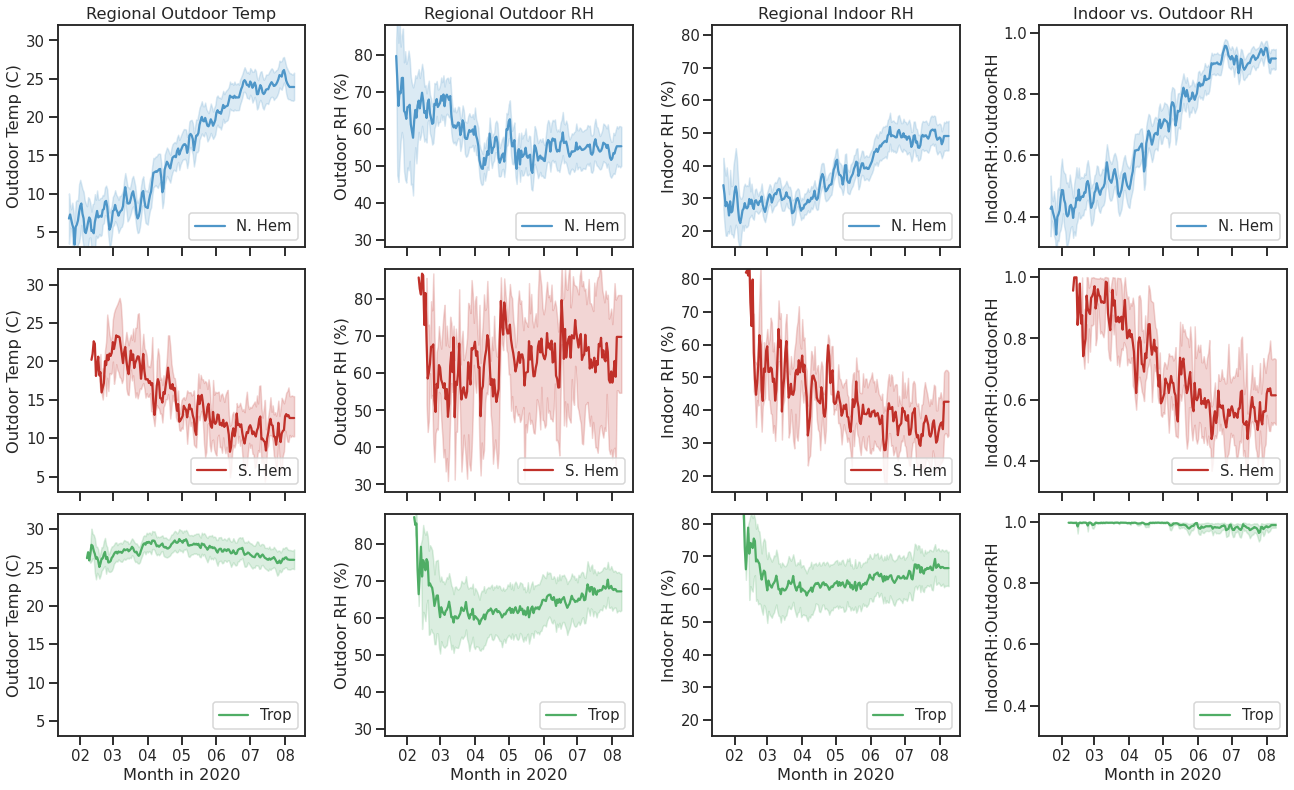

In [ ]:
# Timeseries of outdoor and indoor weather data 

fig,ax = plt.subplots(3,4,sharex='col',sharey='col',figsize=(18,11))

sns.lineplot(x=pd.to_datetime(n_hem['Date'],yearfirst=True,dayfirst=False),y='DailyTemp_C',data=n_hem,ax=ax[0,0],legend=False,color=sns.color_palette(palette='Blues_d',n_colors=4)[1],label='N. Hem'); #sns.despine()
sns.lineplot(x=pd.to_datetime(n_hem['Date'],yearfirst=True,dayfirst=False),y='DailyRH_pct',data=n_hem,ax=ax[0,1],legend=False,color=sns.color_palette(palette='Blues_d',n_colors=4)[1],label='N. Hem'); #sns.despine()
sns.lineplot(x=pd.to_datetime(n_hem['Date'],yearfirst=True,dayfirst=False),y='IndoorRH_pct',data=n_hem,ax=ax[0,2],legend=False,color=sns.color_palette(palette='Blues_d',n_colors=4)[1],label='N. Hem'); #sns.despine()
sns.lineplot(x=pd.to_datetime(n_hem['Date'],yearfirst=True,dayfirst=False),y=n_hem['IndoorRH_pct']/n_hem['DailyRH_pct'],ax=ax[0,3],color=sns.color_palette(palette='Blues_d',n_colors=4)[1],label='N. Hem'); #sns.despine()

sns.lineplot(x=pd.to_datetime(s_hem['Date'],yearfirst=True,dayfirst=False),y='DailyTemp_C',data=s_hem,ax=ax[1,0],legend=False,color=sns.color_palette(palette='Reds_d',n_colors=4)[2],label='S. Hem'); #sns.despine()
sns.lineplot(x=pd.to_datetime(s_hem['Date'],yearfirst=True,dayfirst=False),y='DailyRH_pct',data=s_hem,ax=ax[1,1],legend=False,color=sns.color_palette(palette='Reds_d',n_colors=4)[2],label='S. Hem'); #sns.despine()
sns.lineplot(x=pd.to_datetime(s_hem['Date'],yearfirst=True,dayfirst=False),y='IndoorRH_pct',data=s_hem,ax=ax[1,2],legend=False,color=sns.color_palette(palette='Reds_d',n_colors=4)[2],label='S. Hem'); #sns.despine()
sns.lineplot(x=pd.to_datetime(s_hem['Date'],yearfirst=True,dayfirst=False),y=s_hem['IndoorRH_pct']/s_hem['DailyRH_pct'],ax=ax[1,3],color=sns.color_palette(palette='Reds_d',n_colors=4)[2],label='S. Hem'); #sns.despine()

sns.lineplot(x=pd.to_datetime(trop['Date'],yearfirst=True,dayfirst=False),y='DailyTemp_C',data=trop,ax=ax[2,0],legend=False,color=sns.color_palette(palette='Greens_d',n_colors=4)[1],label='Trop'); #sns.despine()
sns.lineplot(x=pd.to_datetime(trop['Date'],yearfirst=True,dayfirst=False),y='DailyRH_pct',data=trop,ax=ax[2,1],legend=False,color=sns.color_palette(palette='Greens_d',n_colors=4)[1],label='Trop'); #sns.despine()
sns.lineplot(x=pd.to_datetime(trop['Date'],yearfirst=True,dayfirst=False),y='IndoorRH_pct',data=trop,ax=ax[2,2],legend=False,color=sns.color_palette(palette='Greens_d',n_colors=4)[1],label='Trop'); #sns.despine()
sns.lineplot(x=pd.to_datetime(trop['Date'],yearfirst=True,dayfirst=False),y=trop['IndoorRH_pct']/trop['DailyRH_pct'],ax=ax[2,3],color=sns.color_palette(palette='Greens_d',n_colors=4)[1],label='Trop'); #sns.despine()

# Place legends 
[ax[0,c].legend(loc='lower right') for c in np.arange(0,4)]
[ax[1,c].legend(loc='lower right') for c in np.arange(0,4)]
[ax[2,c].legend(loc='lower right') for c in np.arange(0,4)]

# Define Y axis limits 
[ax[r,0].set_ylim(3,32) for r in np.arange(0,3)]; [ax[r,1].set_ylim(28,88) for r in np.arange(0,3)]; [ax[r,2].set_ylim(15,83) for r in np.arange(0,3)]; [ax[r,3].set_ylim(0.3,1.025) for r in np.arange(0,3)]

#ax[0,1].set_ylim(28,88); ax[0,2].set_ylim(15,83); ax[0,3].set_ylim(0.3,1.05)

# Define Y axis labels 
[ax[r,0].set_ylabel('Outdoor Temp (C)') for r in np.arange(0,3)]; 
[ax[r,1].set_ylabel('Outdoor RH (%)') for r in np.arange(0,3)]; 
[ax[r,2].set_ylabel('Indoor RH (%)') for r in np.arange(0,3)]; 
[ax[r,3].set_ylabel('IndoorRH:OutdoorRH') for r in np.arange(0,3)]; 

# Define X axis labels 
ax[2,0].set_xlabel('Month in 2020'); ax[2,1].set_xlabel('Month in 2020'); ax[2,2].set_xlabel('Month in 2020'); ax[2,3].set_xlabel('Month in 2020')

ax[0,0].set_title('Regional Outdoor Temp')
ax[0,1].set_title('Regional Outdoor RH')
ax[0,2].set_title('Regional Indoor RH')
ax[0,3].set_title('Indoor vs. Outdoor RH')

[ax.xaxis.set_major_formatter(md.DateFormatter('%m')) for ax in plt.gcf().axes]
#[ax.tick_params(axis='x',labelrotation=20) for ax in plt.gcf().axes]
#fig.tight_layout()
fig.tight_layout(pad=0.5, w_pad=1.5, h_pad=0.8)

# from google.colab import files
# filename = ('Figure_Outdoor_Indoor_Climate_Timeseries.png')
# fig.savefig(filename, dpi=500)
# files.download(filename)

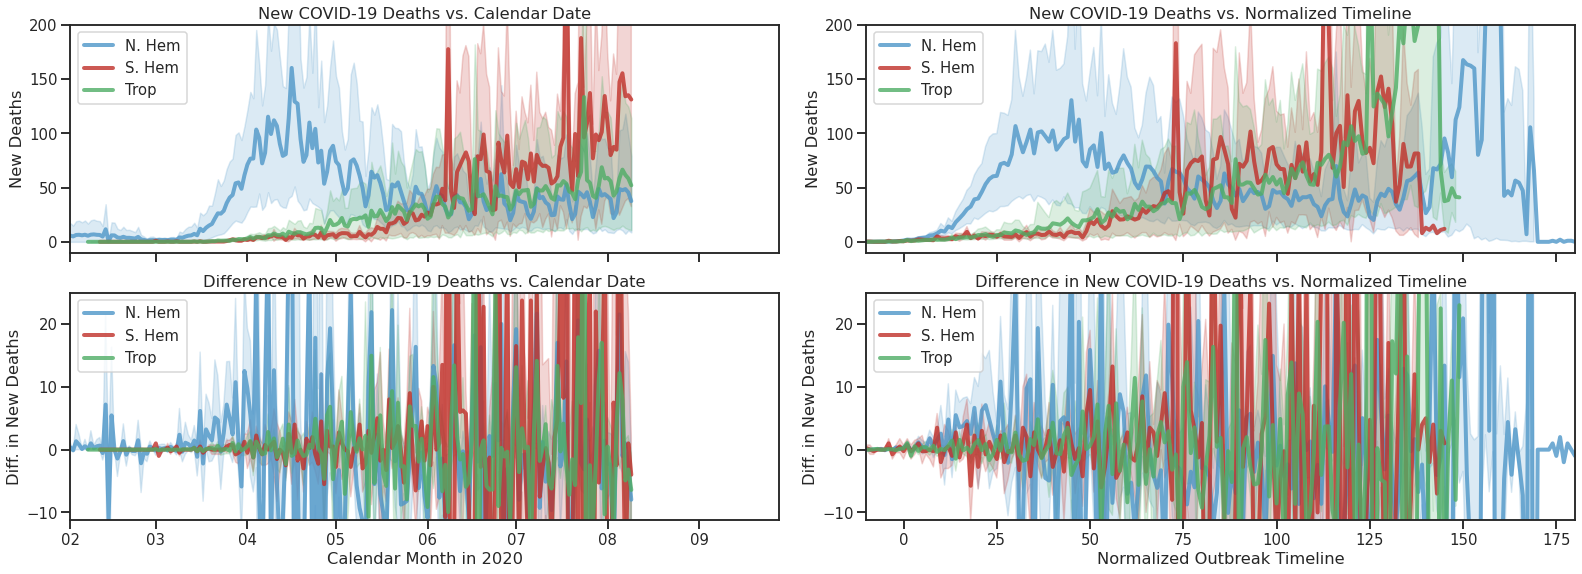

In [ ]:
# Timeseries plots of new deaths and new deaths difference -> broken apart and labeled by region 

# Initialize figure
fig,ax = plt.subplots(2,2,figsize=(22,8),sharex='col')

# New Deaths  
sns.lineplot(x=pd.to_datetime(df7all[df7all['Region']=='n_hem']['Date'],yearfirst=True,dayfirst=False),y='new_deaths',data=df7all[df7all['Region']=='n_hem'],ax=ax[0,0],label='N. Hem',color=sns.color_palette(palette='Blues_d',n_colors=4)[1],linewidth=4,alpha=0.8)
sns.lineplot(x=pd.to_datetime(df7all[df7all['Region']=='s_hem']['Date'],yearfirst=True,dayfirst=False),y='new_deaths',data=df7all[df7all['Region']=='s_hem'],ax=ax[0,0],label='S. Hem',color=sns.color_palette(palette='Reds_d',n_colors=4)[2],linewidth=4,alpha=0.8)
sns.lineplot(x=pd.to_datetime(df7all[df7all['Region']=='trop']['Date'],yearfirst=True,dayfirst=False),y='new_deaths',data=df7all[df7all['Region']=='trop'],ax=ax[0,0],label='Trop',color=sns.color_palette(palette='Greens_d',n_colors=4)[1],linewidth=4,alpha=0.8)

sns.lineplot(x='Days From 5th Death',y='new_deaths',data=df7all[df7all['Region']=='n_hem'],ax=ax[0,1],label='N. Hem',color=sns.color_palette(palette='Blues_d',n_colors=4)[1],linewidth=4,alpha=0.8)
sns.lineplot(x='Days From 5th Death',y='new_deaths',data=df7all[df7all['Region']=='s_hem'],ax=ax[0,1],label='S. Hem',color=sns.color_palette(palette='Reds_d',n_colors=4)[2],linewidth=4,alpha=0.8)
sns.lineplot(x='Days From 5th Death',y='new_deaths',data=df7all[df7all['Region']=='trop'],ax=ax[0,1],label='Trop',color=sns.color_palette(palette='Greens_d',n_colors=4)[1],linewidth=4,alpha=0.8)

ax[0,0].set_title('New COVID-19 Deaths vs. Calendar Date'); ax[0,1].set_title('New COVID-19 Deaths vs. Normalized Timeline')
ax[0,0].set_ylim(-200*0.05,200); ax[0,1].set_ylim(-200*0.05,200); 
[ax[0,c].set_ylabel('New Deaths') for c in np.arange(0,2)]


# New Deaths Difference
sns.lineplot(x=pd.to_datetime(df7all[df7all['Region']=='n_hem']['Date'],yearfirst=True,dayfirst=False),y='new_deaths_diff',data=df7all[df7all['Region']=='n_hem'],ax=ax[1,0],label='N. Hem',color=sns.color_palette(palette='Blues_d',n_colors=4)[1],linewidth=4,alpha=0.8)
sns.lineplot(x=pd.to_datetime(df7all[df7all['Region']=='s_hem']['Date'],yearfirst=True,dayfirst=False),y='new_deaths_diff',data=df7all[df7all['Region']=='s_hem'],ax=ax[1,0],label='S. Hem',color=sns.color_palette(palette='Reds_d',n_colors=4)[2],linewidth=4,alpha=0.8)
sns.lineplot(x=pd.to_datetime(df7all[df7all['Region']=='trop']['Date'],yearfirst=True,dayfirst=False),y='new_deaths_diff',data=df7all[df7all['Region']=='trop'],ax=ax[1,0],label='Trop',color=sns.color_palette(palette='Greens_d',n_colors=4)[1],linewidth=4,alpha=0.8)

sns.lineplot(x='Days From 5th Death',y='new_deaths_diff',data=df7all[df7all['Region']=='n_hem'],ax=ax[1,1],label='N. Hem',color=sns.color_palette(palette='Blues_d',n_colors=4)[1],linewidth=4,alpha=0.8)
sns.lineplot(x='Days From 5th Death',y='new_deaths_diff',data=df7all[df7all['Region']=='s_hem'],ax=ax[1,1],label='S. Hem',color=sns.color_palette(palette='Reds_d',n_colors=4)[2],linewidth=4,alpha=0.8)
sns.lineplot(x='Days From 5th Death',y='new_deaths_diff',data=df7all[df7all['Region']=='trop'],ax=ax[1,1],label='Trop',color=sns.color_palette(palette='Greens_d',n_colors=4)[1],linewidth=4,alpha=0.8)

ax[1,0].set_title('Difference in New COVID-19 Deaths vs. Calendar Date'); ax[1,1].set_title('Difference in New COVID-19 Deaths vs. Normalized Timeline')
ax[1,0].set_ylim(-25*0.45,25); ax[1,1].set_ylim(-25*0.45,25); 
[ax[1,c].set_ylabel('Diff. in New Deaths') for c in np.arange(0,2)]


# Shared attributes 
[ax.legend(loc='upper left') for ax in plt.gcf().axes]
[ax[r,0].set_xlim([datetime.date(2020, 2, 1), datetime.date(2020, 9, 28)]) for r in np.arange(0,2)]
[ax[r,0].xaxis.set_major_formatter(md.DateFormatter('%m')) for r in np.arange(0,2)]
[ax[r,1].set_xlim(-10,180) for r in np.arange(0,2)]
ax[1,0].set_xlabel('Calendar Month in 2020'); ax[1,1].set_xlabel('Normalized Outbreak Timeline')

fig.tight_layout(pad=0.5, w_pad=1.5, h_pad=0.8)

# from google.colab import files
# filename = ('Figure_NewDeaths_NewDeathsDiff_Timeseries_All_NH_SH_Trop.png')
# fig.savefig(filename, dpi=500)
# files.download(filename) 

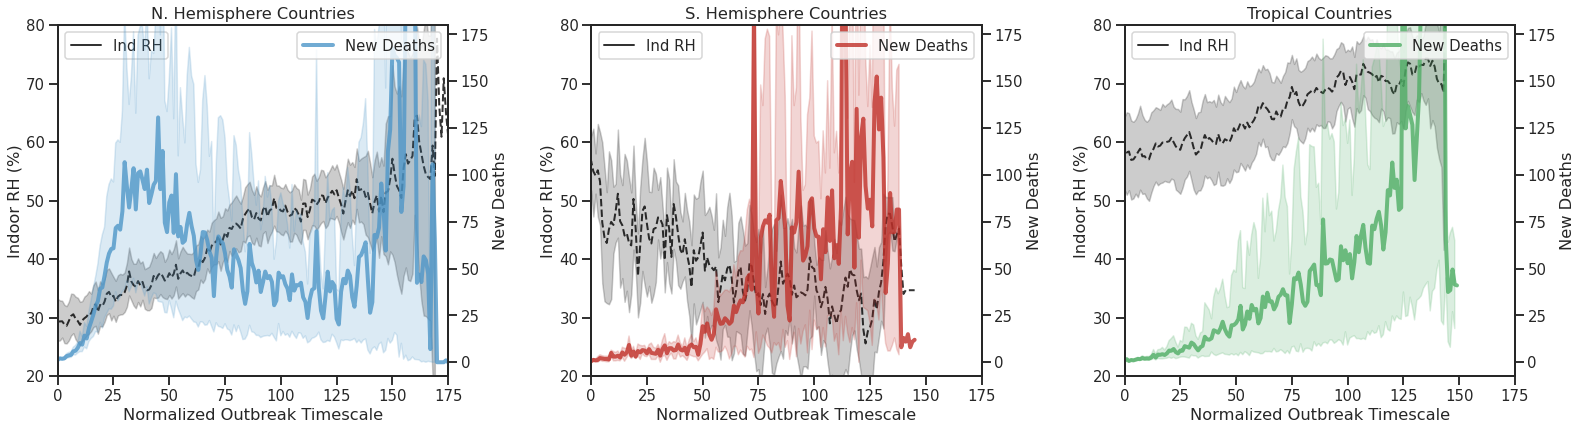

In [ ]:
# Compare new deaths and indoor climate 

fig,ax = plt.subplots(1,3,figsize=(22,6))

# N. Hemisphere 
ax0 = ax[0].twinx()
sns.lineplot(x='Days From 5th Death',y='IndoorRH_pct',data=df7all[df7all['Region']=='n_hem'],ax=ax[0],label='Ind RH',color='black',linewidth=2,alpha=0.8)#,style=True,dashes=[(2,2)])
sns.lineplot(x='Days From 5th Death',y='new_deaths',data=df7all[df7all['Region']=='n_hem'],ax=ax0,label='New Deaths',color=sns.color_palette(palette='Blues_d',n_colors=4)[1],linewidth=4,alpha=0.8)
ax[0].set_ylim(20,80)
ax0.set_ylim(-7.5,180)
ax[0].legend(loc='upper left')
ax0.legend(loc='upper right')
ax[0].lines[0].set_linestyle("--")

# S. Hemisphere 
ax1 = ax[1].twinx()
sns.lineplot(x='Days From 5th Death',y='IndoorRH_pct',data=df7all[df7all['Region']=='s_hem'],ax=ax[1],label='Ind RH',color='black',linewidth=2,alpha=0.8)
sns.lineplot(x='Days From 5th Death',y='new_deaths',data=df7all[df7all['Region']=='s_hem'],ax=ax1,label='New Deaths',color=sns.color_palette(palette='Reds_d',n_colors=4)[2],linewidth=4,alpha=0.8)
ax[1].set_ylim(20,80)
ax1.set_ylim(-7.5,180)
ax[1].legend(loc='upper left')
ax1.legend(loc='upper right')
ax[1].lines[0].set_linestyle("--")


# Trop
ax2 = ax[2].twinx()
sns.lineplot(x='Days From 5th Death',y='IndoorRH_pct',data=df7all[df7all['Region']=='trop'],ax=ax[2],label='Ind RH',color='black',linewidth=2,alpha=0.8)
sns.lineplot(x='Days From 5th Death',y='new_deaths',data=df7all[df7all['Region']=='trop'],ax=ax2,label='New Deaths',color=sns.color_palette(palette='Greens_d',n_colors=4)[1],linewidth=4,alpha=0.8)
ax[2].set_ylim(20,80)
ax2.set_ylim(-7.5,180)
ax[2].legend(loc='upper left')
ax2.legend(loc='upper right')
ax[2].lines[0].set_linestyle("--")


# Labels & Titles 
ax[0].set_title('N. Hemisphere Countries'); ax[1].set_title('S. Hemisphere Countries'); ax[2].set_title('Tropical Countries')
ax[0].set_ylabel('Indoor RH (%)'); ax[1].set_ylabel('Indoor RH (%)'); ax[2].set_ylabel('Indoor RH (%)')
ax0.set_ylabel('New Deaths'); ax1.set_ylabel('New Deaths'); ax2.set_ylabel('New Deaths')

[ax.set_xlabel('Normalized Outbreak Timescale') for ax in plt.gcf().axes]
[ax.set_xlim(0,175) for ax in plt.gcf().axes]
fig.tight_layout(pad=0.5, w_pad=2, h_pad=0.8)

# from google.colab import files
# filename = ('Figure_OutbreakMetrics_and_IndoorRH_Timeseries_All_NH_SH_Trop.png')
# fig.savefig(filename, dpi=500)
# files.download(filename) 

In [ ]:
# Function to create lags of a given variable 

def make_lags(dataframe,merging_var,variable,num_lags):
  df = dataframe[['Country',merging_var,variable]].copy() # Make a copy of the country (for grouping) and the variable to be lagged  

  for i in range(1,num_lags+1):
    df[variable+'_lag{}'.format(i)] = df.groupby('Country')[variable].shift(i) # Create all of the lags of the given input variable 

  return df

In [ ]:
# Function to create a dataframe with lagged versions of the variable and the actual outbreak metrics 

def lagged_var_df(dataframe,merging_var,variable,num_lags,COVIDstats):

  df = dataframe.copy()

  outcomes = df[COVIDstats]

  lagged_variables = make_lags(dataframe,merging_var,variable,num_lags)

  merged = lagged_variables.merge(right=outcomes,how='left',on=['Country',merging_var])

  return merged

In [ ]:
# Create a dataframe with lagged indoor humidity (from 0 days of lag up to 28 days of lag)
COVIDstats = ['Country','Days From 5th Death','total_cases', 'total_cases_per_million', 'new_cases', # Add country and date so there can be correct merging on keys 
       'new_cases_per_million', 'total_deaths', 'total_deaths_per_million',
       'total_deaths_pctchange', 'total_deaths_per_million_pctchange',
       'new_deaths', 'new_deaths_per_million', 'new_deaths_diff',
       'new_deaths_per_million_diff', 'new_deaths_pctchange',
       'new_deaths_per_million_pctchange']

df7all_lag_indrh = lagged_var_df(df7all,'Days From 5th Death','IndoorRH_pct',28,COVIDstats)

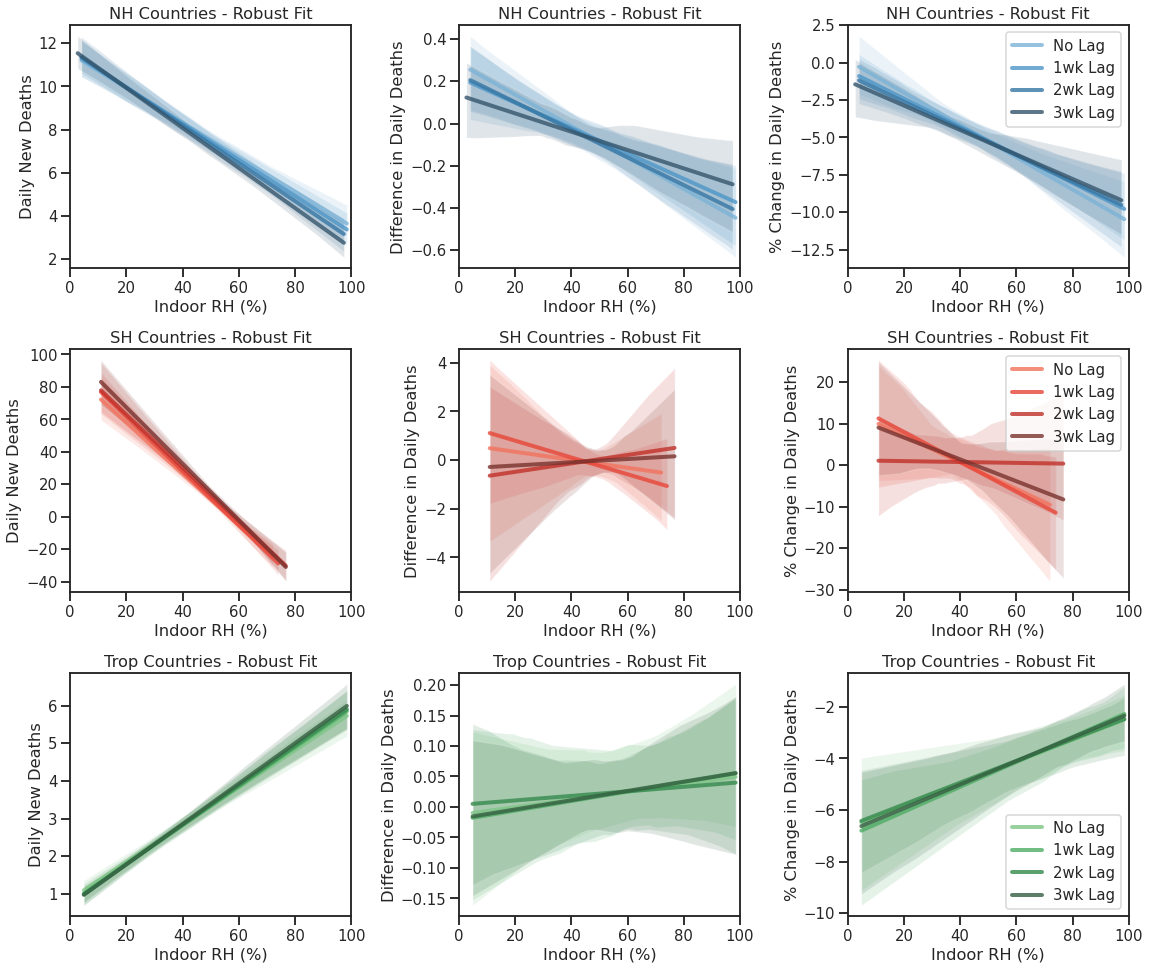

In [ ]:
first_day = 0; last_day = 180 

#all_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=first_day) & (df7all_lag_indrh['Days From 5th Death']<=150)] 
nhem_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=first_day) & (df7all_lag_indrh['Days From 5th Death']<=last_day) & (df7all_lag_indrh['Country'].isin(n_hem['Country'].unique()))]
shem_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=first_day) & (df7all_lag_indrh['Days From 5th Death']<=last_day) & (df7all_lag_indrh['Country'].isin(s_hem['Country'].unique()))]
trop_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=first_day) & (df7all_lag_indrh['Days From 5th Death']<=last_day) & (df7all_lag_indrh['Country'].isin(trop['Country'].unique()))]

outcomes = ['new_deaths','new_deaths_diff','new_deaths_pctchange']
rows = 3; cols = len(outcomes); fig,ax=plt.subplots(rows,cols,figsize=(16,13.5))

# Go through each quantized outbreak metric and make plots 
for col in range(0,cols): 

  # # LOWESS for all countries 
  # #sns.regplot(x='IndoorRH_pct',y=outcomes[col],data=all_forplot,ax=ax[0,col],robust=True,n_boot=100,label='No Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greys_d',n_colors=4)[0])
  # sns.regplot(x='IndoorRH_pct_lag7',y=outcomes[col],data=all_forplot,ax=ax[0,col],robust=True,n_boot=100,label='1wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greys_d',n_colors=4)[1]) 
  # sns.regplot(x='IndoorRH_pct_lag14',y=outcomes[col],data=all_forplot,ax=ax[0,col],robust=True,n_boot=100,label='2wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greys_d',n_colors=4)[2])
  # sns.regplot(x='IndoorRH_pct_lag21',y=outcomes[col],data=all_forplot,ax=ax[0,col],robust=True,n_boot=100,label='3wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greys_d',n_colors=4)[3])

  # LOWESS for n hem countries 
  sns.regplot(x='IndoorRH_pct',y=outcomes[col],data=nhem_forplot,ax=ax[0,col],robust=True,n_boot=100,label='No Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[0])
  sns.regplot(x='IndoorRH_pct_lag7',y=outcomes[col],data=nhem_forplot,ax=ax[0,col],robust=True,n_boot=100,label='1wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[1]) 
  sns.regplot(x='IndoorRH_pct_lag14',y=outcomes[col],data=nhem_forplot,ax=ax[0,col],robust=True,n_boot=100,label='2wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[2])
  sns.regplot(x='IndoorRH_pct_lag21',y=outcomes[col],data=nhem_forplot,ax=ax[0,col],robust=True,n_boot=100,label='3wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[3])

  # LOWESS for s hem countries 
  sns.regplot(x='IndoorRH_pct',y=outcomes[col],data=shem_forplot,ax=ax[1,col],robust=True,n_boot=100,label='No Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[0])
  sns.regplot(x='IndoorRH_pct_lag7',y=outcomes[col],data=shem_forplot,ax=ax[1,col],robust=True,n_boot=100,label='1wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[1]) 
  sns.regplot(x='IndoorRH_pct_lag14',y=outcomes[col],data=shem_forplot,ax=ax[1,col],robust=True,n_boot=100,label='2wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[2])
  sns.regplot(x='IndoorRH_pct_lag21',y=outcomes[col],data=shem_forplot,ax=ax[1,col],robust=True,n_boot=100,label='3wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[3])

  # LOWESS for trop countries 
  sns.regplot(x='IndoorRH_pct',y=outcomes[col],data=trop_forplot,ax=ax[2,col],robust=True,n_boot=100,label='No Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[0])
  sns.regplot(x='IndoorRH_pct_lag7',y=outcomes[col],data=trop_forplot,ax=ax[2,col],robust=True,n_boot=100,label='1wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[1]) 
  sns.regplot(x='IndoorRH_pct_lag14',y=outcomes[col],data=trop_forplot,ax=ax[2,col],robust=True,n_boot=100,label='2wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[2])
  sns.regplot(x='IndoorRH_pct_lag21',y=outcomes[col],data=trop_forplot,ax=ax[2,col],robust=True,n_boot=100,label='3wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[3])

[ax[r,2].legend(loc='upper right') for r in np.arange(0,2)]; ax[2,2].legend(loc='lower right') 

[ax.set_xlim(0,100) for ax in plt.gcf().axes]

[ax[r,0].set_xlabel('Indoor RH (%)') for r in np.arange(0,3)]
[ax[r,1].set_xlabel('Indoor RH (%)') for r in np.arange(0,3)]
[ax[r,2].set_xlabel('Indoor RH (%)') for r in np.arange(0,3)]

[ax[r,0].set_ylabel('Daily New Deaths') for r in np.arange(0,3)]
[ax[r,1].set_ylabel('Difference in Daily Deaths') for r in np.arange(0,3)]
[ax[r,2].set_ylabel('% Change in Daily Deaths') for r in np.arange(0,3)]

# ax[0,0].set_title('All Countries - Robust Fit')
# ax[0,1].set_title('All Countries - Robust Fit')
# ax[0,2].set_title('All Countries - Robust Fit')

ax[0,0].set_title('NH Countries - Robust Fit')
ax[0,1].set_title('NH Countries - Robust Fit')
ax[0,2].set_title('NH Countries - Robust Fit')

ax[1,0].set_title('SH Countries - Robust Fit')
ax[1,1].set_title('SH Countries - Robust Fit')
ax[1,2].set_title('SH Countries - Robust Fit')

ax[2,0].set_title('Trop Countries - Robust Fit')
ax[2,1].set_title('Trop Countries - Robust Fit')
ax[2,2].set_title('Trop Countries - Robust Fit')

fig.tight_layout(pad=0.5,h_pad=1,w_pad=1)

# from google.colab import files
# filename = ('Figure_Robust_DroppedCases_NH_SH_Trop.png')
# fig.savefig(filename, dpi=500)
# files.download(filename) 

In [ ]:
def lowess_with_ci(dataset, xcol, ycol, n_boot, ):
  
  # Import statsmodels api and instantiate the lowess model 
  import statsmodels.api as sm; lowess = sm.nonparametric.lowess

  # Get input and output data vectors 
  df = dataset.dropna().copy(); input=df[xcol]; output=df[ycol] 

  # Dataframe to be used for index matching (bootstrapping uses sampling with replacement, so you'll have duplicates of some indices and missing values at other indices, need a way to match back with original df)
  df_for_index_matching = df[input.name].reset_index()

  # Number of bootstraps and number of samples for each bootstrap (equal to number of samples in vector) 
  n_boot=5; n=len(output)

  bootstrapped_lowess_fits = [] # to hold all of the index-matched lowess fits on the resampled datasets 
  rng = np.random.default_rng(None) # random number generator 
  for i in range(int(n_boot)): 
    resampler = rng.integers(0, n, n, dtype=np.intp) # get random indices -> use these to extract index-matched pairs of xvals and yvals from your input and output vectors 

    resampled_output = output.take(resampler, axis=0) # extract resampled outputs (w/ replacement)

    resampled_input = input.take(resampler, axis=0) # extract resampled inputs (w/ replacement)

    lowess_on_resampled_data = lowess(endog=resampled_output,exog=resampled_input) # use resampled (w/ replacement) dataset to compute a new lowess fit 

    lowess_on_resampled_data_df = pd.DataFrame(data=lowess_on_resampled_data,columns=['input','predicted_output']).set_index('input').drop_duplicates().reset_index() # turn the array into a labeled dataframe and drop duplicated inputs (since you sample with replacement, you'll have duplicated inputs)

    lowess_matched_to_original_data_indices = df_for_index_matching.merge(lowess_on_resampled_data_df.rename(columns={'input':input.name}),how='left')['predicted_output'] # Use the original data vector to match the lowess to the right indices (since you sample with replacement and therefore don't use all of the unique input values)

    bootstrapped_lowess_fits.append(lowess_matched_to_original_data_indices) # Add the index-matched lowess fit to the list 

  full_lowess = pd.DataFrame(lowess(endog=output,exog=input),columns=[input.name,'predicted_output_full']) # final lowess fitting on the entire dataset (no bootstrapping/resampling, use all datapoints once) 

  full_lowess = df_for_index_matching.merge(full_lowess,how='left',on=input.name).drop(columns='index') # Need to match the lowess results to the right index (and corresponding input value) 

  lowess_with_bootstrap = pd.concat([full_lowess,pd.concat(bootstrapped_lowess_fits,axis=1)],axis=1) # Combine the full (all datapoints) lowess fit with the bootstrapped (subsampled) lowess fits 

  lowess_with_bootstrap.loc[:,'uppercl'] = lowess_with_bootstrap.iloc[:,1:].quantile(q=0.975,axis=1) # get the 97.5 percentile for the bootstrapped fits (upper bound for 95% ci)

  lowess_with_bootstrap.loc[:,'lowercl'] = lowess_with_bootstrap.iloc[:,1:].quantile(q=0.025,axis=1) # get the 2.5 percentile for the bootstrapped fits (lower bound for 95% ci)

  lowess_with_bootstrap.sort_values(by=input.name,inplace=True) # sort the values by input so that the fill_between function works properly 

  from scipy.signal import savgol_filter

  lowess_with_bootstrap.loc[:,'uppercl_smooth'] = savgol_filter(lowess_with_bootstrap['uppercl'], 15, 2) # smooth the upper confidence interval 

  lowess_with_bootstrap.loc[:,'lowercl_smooth'] = savgol_filter(lowess_with_bootstrap['lowercl'], 15, 2) # smooth the lower confidence interval 

  return lowess_with_bootstrap[[input.name,'predicted_output_full','uppercl','lowercl','uppercl_smooth','lowercl_smooth']]

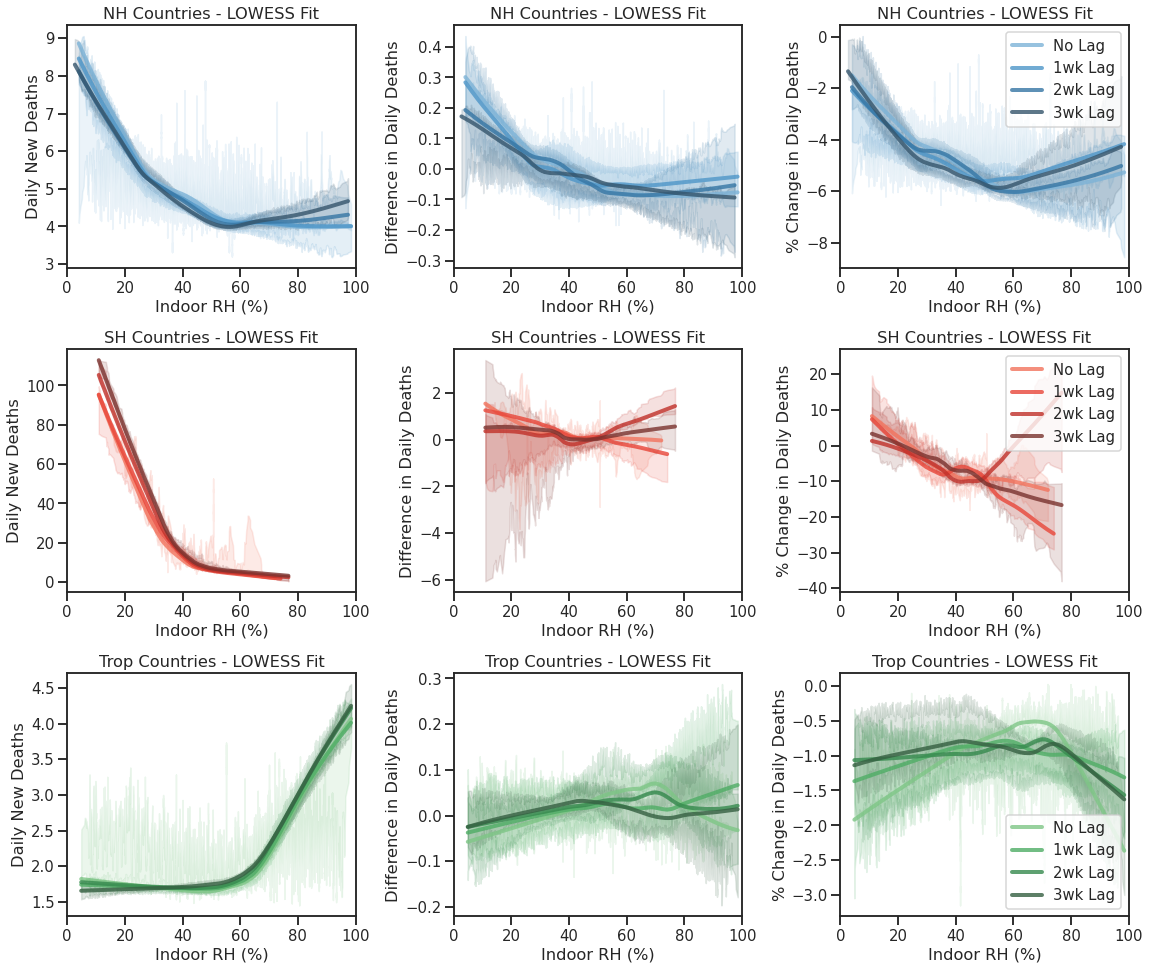

In [ ]:
first_day = 0; last_day = 180 

nhem_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=first_day) & (df7all_lag_indrh['Days From 5th Death']<=last_day) & (df7all_lag_indrh['Country'].isin(n_hem['Country'].unique()))]
shem_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=first_day) & (df7all_lag_indrh['Days From 5th Death']<=last_day) & (df7all_lag_indrh['Country'].isin(s_hem['Country'].unique()))]
trop_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=first_day) & (df7all_lag_indrh['Days From 5th Death']<=last_day) & (df7all_lag_indrh['Country'].isin(trop['Country'].unique()))]

outcomes = ['new_deaths','new_deaths_diff','new_deaths_pctchange']
rows = 3; cols = len(outcomes); fig,ax=plt.subplots(rows,cols,figsize=(16,13.5))

# Go through each quantized outbreak metric and make plots 
for col in range(0,cols): 

  n_boot = 100; # Number of bootstraps to complete for each lowess fit 

  # LOWESS for n hem countries 
  sns.regplot(x='IndoorRH_pct',y=outcomes[col],data=nhem_forplot,ax=ax[0,col],lowess=True,label='No Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[0])
  lowess_conf_intervals = lowess_with_ci(dataset=nhem_forplot, xcol='IndoorRH_pct', ycol=outcomes[col], n_boot=n_boot)
  ax[0,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Blues_d',n_colors=4)[0])

  sns.regplot(x='IndoorRH_pct_lag7',y=outcomes[col],data=nhem_forplot,ax=ax[0,col],lowess=True,label='1wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[1]) 
  lowess_conf_intervals = lowess_with_ci(dataset=nhem_forplot, xcol='IndoorRH_pct_lag7', ycol=outcomes[col], n_boot=n_boot)
  ax[0,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag7'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Blues_d',n_colors=4)[1])

  sns.regplot(x='IndoorRH_pct_lag14',y=outcomes[col],data=nhem_forplot,ax=ax[0,col],lowess=True,label='2wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[2])
  lowess_conf_intervals = lowess_with_ci(dataset=nhem_forplot, xcol='IndoorRH_pct_lag14', ycol=outcomes[col], n_boot=n_boot)
  ax[0,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag14'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Blues_d',n_colors=4)[2])

  sns.regplot(x='IndoorRH_pct_lag21',y=outcomes[col],data=nhem_forplot,ax=ax[0,col],lowess=True,label='3wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[3])
  lowess_conf_intervals = lowess_with_ci(dataset=nhem_forplot, xcol='IndoorRH_pct_lag21', ycol=outcomes[col], n_boot=n_boot)
  ax[0,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag21'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Blues_d',n_colors=4)[3])

  # LOWESS for s hem countries 
  sns.regplot(x='IndoorRH_pct',y=outcomes[col],data=shem_forplot,ax=ax[1,col],lowess=True,label='No Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[0])
  lowess_conf_intervals = lowess_with_ci(dataset=shem_forplot, xcol='IndoorRH_pct', ycol=outcomes[col], n_boot=n_boot)
  ax[1,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Reds_d',n_colors=4)[0])

  sns.regplot(x='IndoorRH_pct_lag7',y=outcomes[col],data=shem_forplot,ax=ax[1,col],lowess=True,label='1wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[1]) 
  lowess_conf_intervals = lowess_with_ci(dataset=shem_forplot, xcol='IndoorRH_pct_lag7', ycol=outcomes[col], n_boot=n_boot)
  ax[1,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag7'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Reds_d',n_colors=4)[1])

  sns.regplot(x='IndoorRH_pct_lag14',y=outcomes[col],data=shem_forplot,ax=ax[1,col],lowess=True,label='2wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[2])
  lowess_conf_intervals = lowess_with_ci(dataset=shem_forplot, xcol='IndoorRH_pct_lag14', ycol=outcomes[col], n_boot=n_boot)
  ax[1,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag14'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Reds_d',n_colors=4)[2])

  sns.regplot(x='IndoorRH_pct_lag21',y=outcomes[col],data=shem_forplot,ax=ax[1,col],lowess=True,label='3wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[3])
  lowess_conf_intervals = lowess_with_ci(dataset=shem_forplot, xcol='IndoorRH_pct_lag21', ycol=outcomes[col], n_boot=n_boot)
  ax[1,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag21'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Reds_d',n_colors=4)[3])


  # LOWESS for trop countries 
  sns.regplot(x='IndoorRH_pct',y=outcomes[col],data=trop_forplot,ax=ax[2,col],lowess=True,label='No Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[0])
  lowess_conf_intervals = lowess_with_ci(dataset=trop_forplot, xcol='IndoorRH_pct', ycol=outcomes[col], n_boot=n_boot)
  ax[2,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Greens_d',n_colors=4)[0])

  sns.regplot(x='IndoorRH_pct_lag7',y=outcomes[col],data=trop_forplot,ax=ax[2,col],lowess=True,label='1wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[1]) 
  lowess_conf_intervals = lowess_with_ci(dataset=trop_forplot, xcol='IndoorRH_pct_lag7', ycol=outcomes[col], n_boot=n_boot)
  ax[2,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag7'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Greens_d',n_colors=4)[1])

  sns.regplot(x='IndoorRH_pct_lag14',y=outcomes[col],data=trop_forplot,ax=ax[2,col],lowess=True,label='2wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[2])
  lowess_conf_intervals = lowess_with_ci(dataset=trop_forplot, xcol='IndoorRH_pct_lag14', ycol=outcomes[col], n_boot=n_boot)
  ax[2,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag14'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Greens_d',n_colors=4)[2])

  sns.regplot(x='IndoorRH_pct_lag21',y=outcomes[col],data=trop_forplot,ax=ax[2,col],lowess=True,label='3wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[3])
  lowess_conf_intervals = lowess_with_ci(dataset=trop_forplot, xcol='IndoorRH_pct_lag21', ycol=outcomes[col], n_boot=n_boot)
  ax[2,col].fill_between(x=lowess_conf_intervals['IndoorRH_pct_lag21'], y1=lowess_conf_intervals['uppercl_smooth'], y2=lowess_conf_intervals['lowercl_smooth'],alpha=0.15, color=sns.color_palette(palette='Greens_d',n_colors=4)[3])

[ax[r,2].legend(loc='upper right') for r in np.arange(0,2)]; ax[2,2].legend(loc='lower right') 

[ax.set_xlim(0,100) for ax in plt.gcf().axes]

[ax[r,0].set_xlabel('Indoor RH (%)') for r in np.arange(0,3)]
[ax[r,1].set_xlabel('Indoor RH (%)') for r in np.arange(0,3)]
[ax[r,2].set_xlabel('Indoor RH (%)') for r in np.arange(0,3)]

[ax[r,0].set_ylabel('Daily New Deaths') for r in np.arange(0,3)]
[ax[r,1].set_ylabel('Difference in Daily Deaths') for r in np.arange(0,3)]
[ax[r,2].set_ylabel('% Change in Daily Deaths') for r in np.arange(0,3)]

ax[0,0].set_title('NH Countries - LOWESS Fit')
ax[0,1].set_title('NH Countries - LOWESS Fit')
ax[0,2].set_title('NH Countries - LOWESS Fit')

ax[1,0].set_title('SH Countries - LOWESS Fit')
ax[1,1].set_title('SH Countries - LOWESS Fit')
ax[1,2].set_title('SH Countries - LOWESS Fit')

ax[2,0].set_title('Trop Countries - LOWESS Fit')
ax[2,1].set_title('Trop Countries - LOWESS Fit')
ax[2,2].set_title('Trop Countries - LOWESS Fit')

fig.tight_layout(pad=0.5,h_pad=1,w_pad=1)

# from google.colab import files
# filename = ('Figure_LOWESS_DroppedCases_NH_SH_Trop_WITHConfIntervals.png')
# fig.savefig(filename, dpi=500)
# files.download(filename) 

In [ ]:
def quantizer(dataframe, first_day, last_day, qlevels, countries, retbins):

  # Dataframe to use for plotting -> Set lower and upper bound for days from 5th death, only use the selected list of countries (could be all, n_hem, s_hem, trop, or for a given month)
  df = dataframe[(dataframe['Days From 5th Death'].ge(first_day)) & (dataframe['Days From 5th Death'].le(last_day)) & (dataframe['Country'].isin(countries))].copy()

  if retbins == True: # return the bin ranges and label each category with the bin range 
    # Apply qcut to break the outbreak metrics into different evenly-distributed quantiles 
    df.loc[:,'new_cases_Qlevels'] = pd.qcut(x=df.loc[:,'new_cases'],q=qlevels,retbins=True,precision=1,duplicates='drop')[0]
    df.loc[:,'new_deaths_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths'],q=qlevels,retbins=True,precision=1,duplicates='drop')[0]
    df.loc[:,'new_deaths_diff_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths_diff'],q=qlevels,retbins=True,precision=1,duplicates='drop')[0]
    df.loc[:,'new_deaths_pctchange_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths_pctchange'],q=qlevels,retbins=True,precision=1,duplicates='drop')[0]
  
  else: # don't retun the bin ranges and label each category with an integer
    # Apply qcut to break the outbreak metrics into different evenly-distributed quantiles 
    df.loc[:,'new_cases_Qlevels'] = pd.qcut(x=df.loc[:,'new_cases'],q=qlevels,duplicates='drop',labels=False).astype('category')
    df.loc[:,'new_deaths_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths'],q=qlevels,duplicates='drop',labels=False).astype('category')
    df.loc[:,'new_deaths_diff_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths_diff'],q=qlevels,duplicates='drop',labels=False).astype('category')
    df.loc[:,'new_deaths_pctchange_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths_pctchange'],q=qlevels,duplicates='drop',labels=False).astype('category')

  return df

In [ ]:
# Function for changing seaborn barplot width 
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

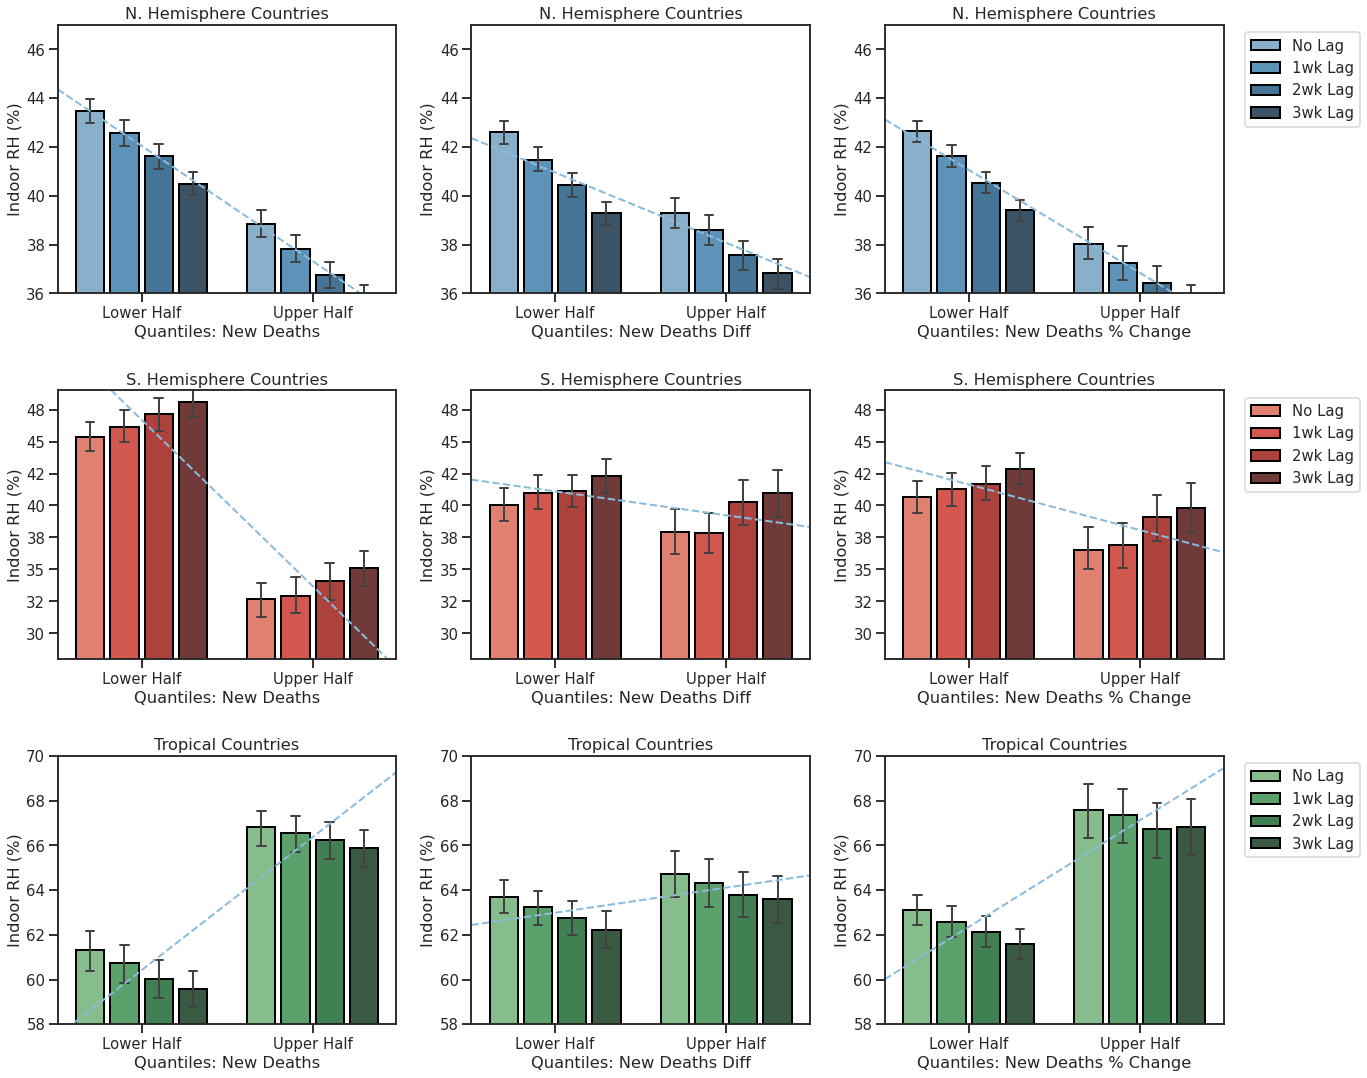

In [ ]:
first_day = 0; last_day = 180; qlevels = 2; # Parameters for quantizing the dataset 

qtotal = quantizer(dataframe=df7all_lag_indrh, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False) # quantize all outbreaks
qnhem = quantizer(dataframe=df7all_lag_indrh, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=n_hem['Country'].unique(), retbins=False) # quantize the N. Hem outbreaks 
qshem = quantizer(dataframe=df7all_lag_indrh, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=s_hem['Country'].unique(), retbins=False) # quantize the S. Hem outbreaks 
qtrop = quantizer(dataframe=df7all_lag_indrh, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=trop['Country'].unique(), retbins=False) # quantize the Trop outbreaks 


# Set up the plotting 
quantized_outcomes = ['new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
rows = 3; cols = len(quantized_outcomes); fig,ax=plt.subplots(rows,cols,figsize=(19,15))

# Go through each quantized outbreak metric and make plots 
for col in range(0,cols): 

  # All countries colored bar plots and best fit 
  #meltall = pd.melt(qtotal, id_vars=quantized_outcomes[col], value_vars=['IndoorRH_pct','IndoorRH_pct_lag7','IndoorRH_pct_lag14','IndoorRH_pct_lag21'])
  #sns.barplot(x=quantized_outcomes[col], y='value', hue='variable', data=meltall,ax=ax[0,col],capsize=.05,errwidth=2,edgecolor='black',linewidth=2,palette=sns.color_palette(palette='Greys_d',n_colors=4))
  #sns.regplot(x=np.arange(0,len(meltall[quantized_outcomes[col]].cat.categories)),y=meltall.groupby(quantized_outcomes[col])['value'].mean().values,ci=None,line_kws={'linestyle': '--','linewidth':2},scatter=False,ax=ax[0,col],truncate=False)

  # Northern hemisphere colored bar plots and best fit 
  meltnhem = pd.melt(qnhem, id_vars=quantized_outcomes[col], value_vars=['IndoorRH_pct','IndoorRH_pct_lag7','IndoorRH_pct_lag14','IndoorRH_pct_lag21'])
  sns.barplot(x=quantized_outcomes[col], y='value', hue='variable', data=meltnhem,ax=ax[0,col],capsize=.05,errwidth=2,edgecolor='black',linewidth=2,palette=sns.color_palette(palette='Blues_d',n_colors=4))
  sns.regplot(x=np.arange(0,len(meltnhem[quantized_outcomes[col]].cat.categories)),y=meltnhem.groupby(quantized_outcomes[col])['value'].mean().values,ci=None,line_kws={'linestyle': '--','linewidth':2},scatter=False,ax=ax[0,col],truncate=False)

  # Southern hemisphere colored bar plots and best fit 
  meltshem = pd.melt(qshem, id_vars=quantized_outcomes[col], value_vars=['IndoorRH_pct','IndoorRH_pct_lag7','IndoorRH_pct_lag14','IndoorRH_pct_lag21'])
  sns.barplot(x=quantized_outcomes[col], y='value', hue='variable', data=meltshem,ax=ax[1,col],capsize=.05,errwidth=2,edgecolor='black',linewidth=2,palette=sns.color_palette(palette='Reds_d',n_colors=4))
  sns.regplot(x=np.arange(0,len(meltshem[quantized_outcomes[col]].cat.categories)),y=meltshem.groupby(quantized_outcomes[col])['value'].mean().values,ci=None,line_kws={'linestyle': '--','linewidth':2},scatter=False,ax=ax[1,col],truncate=False)

  # Tropical colored bar plots and best fit 
  melttrop = pd.melt(qtrop, id_vars=quantized_outcomes[col], value_vars=['IndoorRH_pct','IndoorRH_pct_lag7','IndoorRH_pct_lag14','IndoorRH_pct_lag21'])
  sns.barplot(x=quantized_outcomes[col], y='value', hue='variable', data=melttrop,ax=ax[2,col],capsize=.05,errwidth=2,edgecolor='black',linewidth=2,palette=sns.color_palette(palette='Greens_d',n_colors=4))
  sns.regplot(x=np.arange(0,len(melttrop[quantized_outcomes[col]].cat.categories)),y=melttrop.groupby(quantized_outcomes[col])['value'].mean().values,ci=None,line_kws={'linestyle': '--','linewidth':2},scatter=False,ax=ax[2,col],truncate=False)

# Define custom plotting legends 
# Remove legends in the first 3 plots for all 3 rows 
[ax[r,c].get_legend().remove() for r in np.arange(0,3) for c in np.arange(0,3)] 
# Get handles and labels information for the legend, then use these same handles and specify custom label names and custom label location in the subsequent line
handles, labels = ax[0,2].get_legend_handles_labels(); ax[0,2].legend(handles, ['No Lag','1wk Lag','2wk Lag','3wk Lag'],bbox_to_anchor=(1.04,1), loc="upper left") # Rename the legend labels and place it outside of the figure
handles, labels = ax[1,2].get_legend_handles_labels(); ax[1,2].legend(handles, ['No Lag','1wk Lag','2wk Lag','3wk Lag'],bbox_to_anchor=(1.04,1), loc="upper left") # Rename the legend labels and place it outside of the figure
handles, labels = ax[2,2].get_legend_handles_labels(); ax[2,2].legend(handles, ['No Lag','1wk Lag','2wk Lag','3wk Lag'],bbox_to_anchor=(1.04,1), loc="upper left") # Rename the legend labels and place it outside of the figure
#handles, labels = ax[3,2].get_legend_handles_labels(); ax[3,2].legend(handles, ['No Lag','1wk Lag','2wk Lag','3wk Lag'],bbox_to_anchor=(1.04,1), loc="upper left") # Rename the legend labels and place it outside of the figure

# Define xlabels 
[ax[r,0].set_xlabel('Quantiles: New Deaths') for r in np.arange(0,3)]; [ax[r,1].set_xlabel('Quantiles: New Deaths Diff') for r in np.arange(0,3)]
[ax[r,2].set_xlabel('Quantiles: New Deaths % Change') for r in np.arange(0,3)]; #[ax[r,3].set_xlabel('Quantiles: New Deaths % Change') for r in np.arange(0,4)]

# Define ylabels 
[ax.set_ylabel('Indoor RH (%)') for ax in plt.gcf().axes]

# Define titles
#[ax[0,c].set_title('All Countries') for c in np.arange(0,3)]
[ax[0,c].set_title('N. Hemisphere Countries') for c in np.arange(0,3)]
[ax[1,c].set_title('S. Hemisphere Countries') for c in np.arange(0,3)]
[ax[2,c].set_title('Tropical Countries') for c in np.arange(0,3)]

# Define ylims 
# #[ax[0,c].set_ylim(42,52) for c in np.arange(0,3)]
[ax[0,c].set_ylim(36,47) for c in np.arange(0,3)]
[ax[1,c].set_ylim(28,49) for c in np.arange(0,3)]
[ax[2,c].set_ylim(58,70) for c in np.arange(0,3)]
[ax.set_xticklabels(['Lower Half','Upper Half']) for ax in plt.gcf().axes]

from matplotlib.ticker import FormatStrFormatter
[ax.yaxis.set_major_formatter(FormatStrFormatter('%.f')) for ax in plt.gcf().axes]

[change_width(ax, 0.165) for ax in plt.gcf().axes]
fig.tight_layout(pad=0.5,h_pad=2,w_pad=1.5)

# from google.colab import files
# filename = ('Figure_OutbreakQuantiles_Barplots_DroppedCases_NH_SH_Tr.png')
# fig.savefig(filename, dpi=500)
# files.download(filename) 

In [ ]:
# Discretize the treatment  
bins = [0,40,60,100] # How to break up the continuous variable (0-40),(40-60),(60-100)
labels = [0,1,2] # How to label the bins 
df7all_lag_indrh['quantized_IndRH'] = pd.cut(df7all_lag_indrh['IndoorRH_pct'],bins=bins,labels=labels) # Use cut to break up the continuous data 
df7all_lag_indrh['quantized_IndRH_lag7'] = pd.cut(df7all_lag_indrh['IndoorRH_pct_lag7'],bins=bins,labels=labels) # Use cut to break up the continuous data 
df7all_lag_indrh['quantized_IndRH_lag14'] = pd.cut(df7all_lag_indrh['IndoorRH_pct_lag14'],bins=bins,labels=labels) # Use cut to break up the continuous data 
df7all_lag_indrh['quantized_IndRH_lag21'] = pd.cut(df7all_lag_indrh['IndoorRH_pct_lag21'],bins=bins,labels=labels) # Use cut to break up the continuous data 

# Binarize the treatment (so <40 and >60 are untreated, 40-60 are treated) 
binary_treatment = df7all_lag_indrh.copy()
binary_treatment.loc[:,['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']] = binary_treatment.loc[:,['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']].replace(2,0)

# Binarize the outbreak metrics 
first_day = 0; last_day = 180; qlevels=2
df7all_lag_indrh_q = quantizer(dataframe=df7all_lag_indrh, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all_lag_indrh['Country'].unique(), retbins=False)
binary_treatment_q = quantizer(dataframe=binary_treatment, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all_lag_indrh['Country'].unique(), retbins=False)


In [ ]:
import statsmodels.api as sm

def oddsratio(dataset,outcome,treatment):
  
  data = dataset[[outcome,treatment]].copy() # Copy dataset 

  contig_table = pd.crosstab(data[outcome],data[treatment]).iloc[::-1,] # Make a 2x2 contingency table, 00 = Bad Outcome/No Treatment, 10 = Good Outcome/No Treatment, 01 = Bad Outcome/Treatment, 11 = Good Outcome/Treatment 
  #print(contig_table)

  table = sm.stats.Table2x2(np.asarray(contig_table)) # Use statsmodels to turn the contingency table into a special 2x2 table for further statsmodels calculations 
  #print(table)

  #table=sm.stats.Table2x2.from_data(data) # Make a contingency table, 00 = Bad Outcome/No Treatment, 10 = Good Outcome/No Treatment, 01 = Bad Outcome/Treatment, 11 = Good Outcome/Treatment 

  odds_badoutcome_notreatment = contig_table.iloc[0,0]/contig_table.iloc[1,0] # Odds of having a worse outcome (e.g. more deaths) WITHOUT treatment (e.g. RH<40% or RH>60%) 
  odds_badoutcome_withtreatment = contig_table.iloc[0,1]/contig_table.iloc[1,1] # Odds of having a worse outcome (e.g. more deaths) WITH treatment (e.g. RH 40%-60%) 

  odds_ratio = table.oddsratio # Odds ratio (ratio of odds_badoutcome_notreatment to odds_badoutcome_withtreatment) -> how much more likely are you to have a bad outcome if you don't receive the treatment 
  LCB = table.oddsratio_confint()[0] # Lower 95% confidence boundary
  UCB = table.oddsratio_confint()[1] # Upper 95% confidence boundary 
  pval = table.oddsratio_pvalue() # p-value for a hypothesis test about the odds ratio

  return odds_badoutcome_notreatment, odds_badoutcome_withtreatment, odds_ratio, LCB, UCB, pval 

# To run function... 
# oddsratio(dataset=treat_total,outcome='new_cases_Qlevels',treatment='quantized_IndRH')

In [ ]:
# Compute odds ratios by region (All Countries, NH, SH, Trop) 

first_day = 0; last_day = 180; qlevels=2
treat_total = quantizer(dataframe=binary_treatment, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_nhem = quantizer(dataframe=binary_treatment, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=n_hem['Country'].unique(), retbins=False).dropna()
treat_shem = quantizer(dataframe=binary_treatment, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=s_hem['Country'].unique(), retbins=False).dropna()
treat_trop = quantizer(dataframe=binary_treatment, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=trop['Country'].unique(), retbins=False).dropna()


quantized_outcomes = ['new_cases_Qlevels','new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']
dataset_list = [treat_total, treat_nhem, treat_shem, treat_trop]
dataset_names = ['All','NH','SH','Tro']


level3 = []
for outcome in quantized_outcomes: 

  level2 = []
  for humidity in quantized_humidities: 

    
    level1 = [] # Empty list to store each output from the primary calculations

    for dset in dataset_list: 

      computeOR = oddsratio(dataset=dset,outcome=outcome,treatment=humidity) # Compute the odds for NO treatment odds for WITH treatment, odds ratio, LCL, UCL, and pval

      level1.append(computeOR) # Append the output tuple to the list 

    df_level1 = pd.DataFrame(level1, columns =['oddsbad_NO_treatment', 'oddsbad_WITH_treatment', 'odds_ratio','LCL','UCL','pval'],index=dataset_names) # Put all outputs into a labeled dataframe

    level2.append(df_level1) # Put the labeled output dataframe (calculations for each region) into the list of dataframes in level 2 (calculations for each time-lagged humidity value) 
  
  df_level2 = pd.concat(level2,keys=quantized_humidities) # Put all dfs into a multi-index dataframe 

  level3.append(df_level2) # Put the multi-index dataframes (calcs for each region and each time-lag) into the list of dataframes in level 3(calculations for each COVID-19 outbreak metric) 

df_ORs_byregion = pd.concat(level3, keys=quantized_outcomes) # Put all of the multi-index dataframes into a final multi-index dataframe 

print('Done')

Done


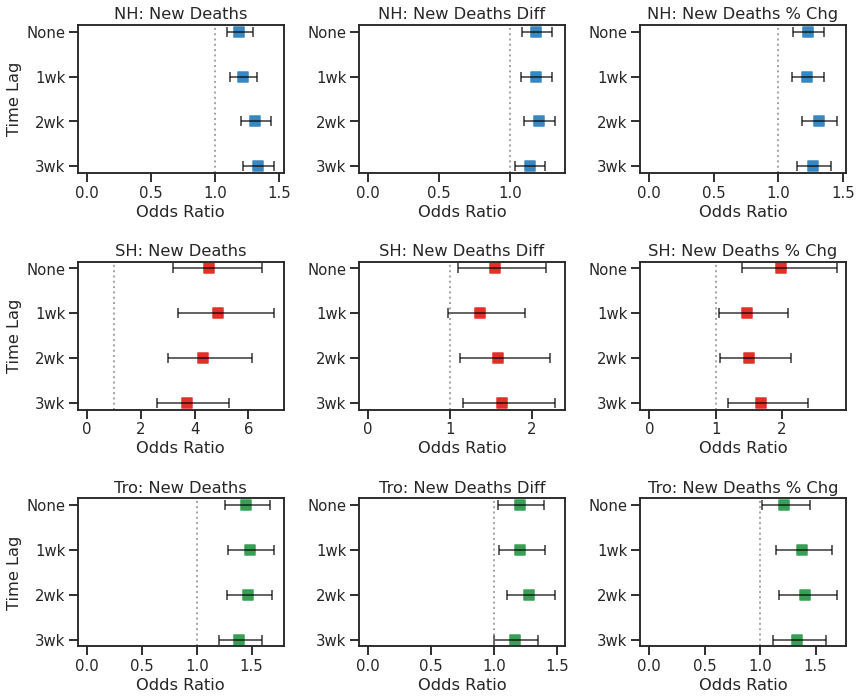

In [ ]:
# Set up the plotting 
quantized_outcomes = ['new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']
dataset_names = ['NH','SH','Tro']

rows = len(dataset_names); cols = len(quantized_outcomes); fig,ax=plt.subplots(rows,cols,figsize=(12,9.75))

points = []; lines=[]
# Go through each quantized outbreak metric and make plots 
for col in range(0,cols):
  for lag in range(len(quantized_humidities)):
    for region in range(len(dataset_names)):

      data_for_plotting = df_ORs_byregion.loc[(quantized_outcomes[col],quantized_humidities[lag],dataset_names[region])]
      ax[region,col].errorbar(x=data_for_plotting['odds_ratio'],y=lag,xerr=np.array([data_for_plotting['odds_ratio']-data_for_plotting['LCL'],data_for_plotting['UCL']-data_for_plotting['odds_ratio']]).reshape(-1,1),capsize=5,capthick=2,elinewidth=2,ecolor='k',alpha=0.6,dash_capstyle='butt')
      points.append(ax[region,col].scatter(data_for_plotting['odds_ratio'],lag,marker='s',color='k',alpha=1,s=120))
      ax[region,col].set_yticks(range(0,len(quantized_humidities)))
      ax[region,col].set_yticklabels(['None','1wk','2wk','3wk'])

#ax[0,0].set_title('All: New Deaths')
ax[0,0].set_title('NH: New Deaths')
ax[1,0].set_title('SH: New Deaths')
ax[2,0].set_title('Tro: New Deaths')

#ax[0,1].set_title('All: New Deaths Diff')
ax[0,1].set_title('NH: New Deaths Diff')
ax[1,1].set_title('SH: New Deaths Diff')
ax[2,1].set_title('Tro: New Deaths Diff')

#ax[0,2].set_title('All: New Deaths % Chg')
ax[0,2].set_title('NH: New Deaths % Chg')
ax[1,2].set_title('SH: New Deaths % Chg')
ax[2,2].set_title('Tro: New Deaths % Chg')

[ax.set_xlabel('Odds Ratio') for ax in plt.gcf().axes]

[ax[r,0].set_ylabel('Time Lag') for r in np.arange(0,3)]

#[points[i].set_color(sns.color_palette(palette='Greys_d',n_colors=1)) for i in range(0,36,3)]
[points[i].set_color(sns.color_palette(palette='Blues_d',n_colors=1)) for i in range(0,36,3)]
[points[i].set_color(sns.color_palette(palette='Reds_d',n_colors=1)) for i in range(1,37,3)]
[points[i].set_color(sns.color_palette(palette='Greens_d',n_colors=1)) for i in range(2,38,3)]

[ax.axvline(x=0,color='grey',alpha=0.0,linewidth=0) for ax in plt.gcf().axes]
[ax.axvline(x=1,linestyle=':',color='grey',alpha=0.7,linewidth=2) for ax in plt.gcf().axes]
[ax.invert_yaxis() for ax in plt.gcf().axes]
fig.tight_layout(pad=0.5,h_pad=1.5,w_pad=1)

# from google.colab import files
# filename = ('Figure_OddsRatios_DroppedCases_NH_SH_Trop.png')
# fig.savefig(filename, dpi=500)
# files.download(filename) 